## DeepMIP Eocene Model-Data Plots by SK (adapted by NJB August 2022 & Jan 2023)

data directory in COLA /shared/CAREER_PWC/DeepMIP

In [1]:
import warnings
# just for visualization
warnings.filterwarnings('ignore')

In [2]:
%reset -f
import xarray as xr
import numpy as np
import aoespy as ap
import matplotlib.pyplot as plt
import math

In [3]:
data=ap.load("/project/CAREER_PWC/nburls/DeepMIP_Eocene/DeepMIP_Eocene_Hydro/data/DeepmipEocene_processed_data_Jan2023.npz")
s=(ap.array(data.files)).astype(str)
for i in range(len(s)):
	ii=str(s[i]); print(ii)
	e=ii+"=data['"+ii+"']";
	exec(e)

sftlf
ts
pr
ev
ps
q
v
u
lon
lat
lev


In [4]:
# Convert to mm/day
ev=ev*86400
pr=pr*86400
pe=pr-ev

In [5]:
dir='/shared/CAREER_PWC/DeepMIP-Eocene/User_Model_Database_v1.0/'
mdir=['CESM','COSMOS','GFDL','HadCM3','HadCM3','INMCM','IPSL','MIROC','NorESM']
model=['CESM1.2_CAM5','COSMOS-landveg_r2413','GFDL_CM2.1','HadCM3B_M2.1aN','HadCM3BL_M2.1aN','INM-CM4-8','IPSLCM5A2','MIROC4m','NorESM1_F']

proj=['piControl','deepmip_sens_1xCO2','deepmip_sens_2xCO2','deepmip_stand_3xCO2','deepmip_sens_4xCO2',\
      'deepmip_stand_6xCO2','deepmip_sens_9xCO2']

model_name=['CESM','COSMOS','GFDL','HadCM3B','HadCM3BL','INMCM','IPSL','MIROC','NorESM']

proj_name=['PI Control','1xCO2','2xCO2','3xCO2','4xCO2',\
      '6xCO2','9xCO2']

In [6]:
## Multi model mean plot

prMMM=np.nanmean(pr[:,:,:,1:7],2)
tsMMM=np.nanmean(ts[:,:,:,1:7],2)
peMMM=np.nanmean(pe[:,:,:,1:7],2)

#pranoMMM=np.nanmean(pranom,2)
#tsanoMMM=np.nanmean(tsanom,2)
#peanoMMM=np.nanmean(peanom,2)

In [7]:
# Create zonal mean
przonal=np.nanmean(pr,1)

## Compare With Precip Reconstructions

In [8]:
import pandas as pd
from matplotlib.lines import Line2D

In [9]:
#load the proxy data
proxloc = "/project/CAREER_PWC/nburls/DeepMIP_Eocene/DeepMIP_Eocene_Hydro/data/DeepMIP_Hydrology_Compilation_v1_21-09-28_final_for_MS.csv"
prox = pd.read_csv(proxloc,header=0,error_bad_lines=False, sep=',')
#prox.columns

eocene=prox

eocenepr_avg=eocene['map_average']*10/365
eocenepr_max=eocene['map_max']*10/365
eocenepr_min=eocene['map_min']*10/365
eocenepr_avg=eocenepr_avg.to_numpy()
eocenepr_max=eocenepr_max.to_numpy()
eocenepr_min=eocenepr_min.to_numpy()

# eocenepr_avg=eocenepr_avg[np.logical_not(np.isnan(eocenepr_avg))] #remove nans
# eocenepr_min=eocenepr_min[np.logical_not(np.isnan(eocenepr_avg))]
# eocenepr_max=eocenepr_max[np.logical_not(np.isnan(eocenepr_avg))]

lat_hotspotslate=eocene['paleolat_HS_45']
lat_hotspotsearly=eocene['paleolat_HS_59']
lat_hotspotsDeepMIP=(lat_hotspotslate+lat_hotspotsearly)/2
lat_paleomaglate=eocene['paleolat_PM_45']
lat_paleomagearly=eocene['paleolat_PM_59']
paleolats=[lat_hotspotsearly,lat_hotspotslate,lat_paleomagearly,lat_paleomaglate,lat_hotspotsDeepMIP]

lon_hotspotslate=eocene['paleolon_HS_45']
lon_hotspotsearly=eocene['paleolon_HS_59']
lon_hotspotsDeepMIP=(lon_hotspotslate+lon_hotspotsearly)/2
lon_paleomaglate=eocene['paleolon_PM_45']
lon_paleomagearly=eocene['paleolon_PM_59']
paleolons=[lon_hotspotsearly,lon_hotspotslate,lon_paleomagearly,lon_paleomaglate,lon_hotspotsDeepMIP]

In [10]:
eocene.columns

Index(['sitename_full', 'sitename_short', 'age_ma', 'age_ma_min', 'age_ma_max',
       'epoch', 'stage_or_reportedage', 'age', 'modlat', 'modlon',
       'paleolat_HS_45', 'paleolon_HS_45', 'paleolat_HS_59', 'paleolon_HS_59',
       'paleolat_PM_45', 'paleolon_PM_45', 'paleolat_PM_59', 'paleolon_PM_59',
       'gridlocation', 'continent_ocean', 'map_min', 'map_average', 'map_max',
       'errortype_orig', 'errortype', 'proxytype', 'fossiltype', 'leadauthor',
       'year', 'DOI', 'original_source_data', 'original_source_DOI',
       'entered_by', 'edited_by', 'carm2016_or_new', 'carm2016_notes', 'notes',
       'deepmip_interval', 'calibration', 'age_model'],
      dtype='object')

In [11]:
eocenepr_avg=eocene['map_average']*10/365
eocenepr_max=eocene['map_max']*10/365
eocenepr_min=eocene['map_min']*10/365
eocenepr_avg=eocenepr_avg.to_numpy()
eocenepr_max=eocenepr_max.to_numpy()
eocenepr_min=eocenepr_min.to_numpy()

# get an average value from limits when none exists
avg_nans=np.argwhere(np.isnan(eocenepr_avg))
eocenepr_avg[avg_nans]=(eocenepr_max[avg_nans]+eocenepr_max[avg_nans])/2

# use average value when no limits
min_nans=np.argwhere(np.isnan(eocenepr_min))
eocenepr_min[min_nans]=eocenepr_avg[min_nans]
eocenepr_max[min_nans]=eocenepr_avg[min_nans]

# only has a min value so excluding
#eocenepr_avg[265]=eocenepr_min[265]
#eocenepr_max[265]=eocenepr_min[265]

In [12]:
cols=['tab:blue','tab:orange','tab:green','tab:purple','tab:red','tab:brown','tab:pink','tab:cyan','tab:brown']
d = {np.unique(prox.proxytype)[x]: cols[x] for x in range(len(np.unique(prox.proxytype)))}
d['ba']

'tab:blue'

Text(0.5, 1.0, 'MAP by Proxy Type')

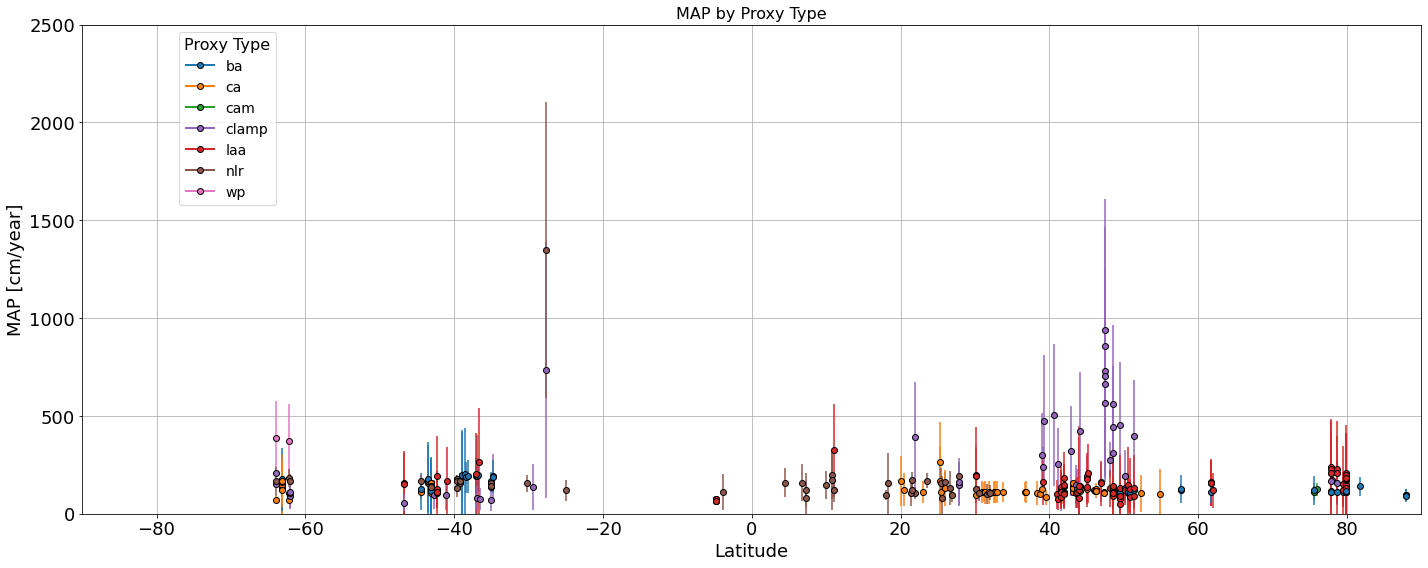

In [13]:
# Plot in origional units of cm per year with modern lat
plt.figure(figsize=(24,9))

cols=['tab:blue','tab:orange','tab:green','tab:purple','tab:red','tab:brown','tab:pink','tab:cyan','tab:brown']
d = {np.unique(prox.proxytype)[x]: cols[x] for x in range(len(np.unique(prox.proxytype)))}

for i in eocene.index:
    plt.errorbar(eocene['modlat'][i],eocene['map_average'][i],yerr=(eocene['map_max'][i]-eocene['map_min'][i]),ls='none',ecolor=d[eocene['proxytype'][i]])
    plt.plot(eocene['modlat'][i],eocene['map_average'][i],'ok',color=d[eocene['proxytype'][i]], markeredgecolor='black')
    
plt.xlabel('Latitude', size=18)
plt.ylabel('MAP [cm/year]', size=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([-90,90])
plt.ylim([0,2500])
plt.grid(which='major')

leg=[]
for i in range(len(np.unique(eocene['proxytype']))):
    leg.append(Line2D([0], [0], color=cols[i], marker='o', markeredgecolor='black', lw=2, label=np.unique(eocene['proxytype'])[i]))
plt.legend(handles=leg,bbox_to_anchor=(0.15,1),title='Proxy Type',fontsize=14,title_fontsize=16)
plt.title('MAP by Proxy Type', size=16)
#plt.savefig('MAP_zonal_proxytype.pdf', format='pdf')

Text(0.5, 1.0, 'MAP by Proxy Type')

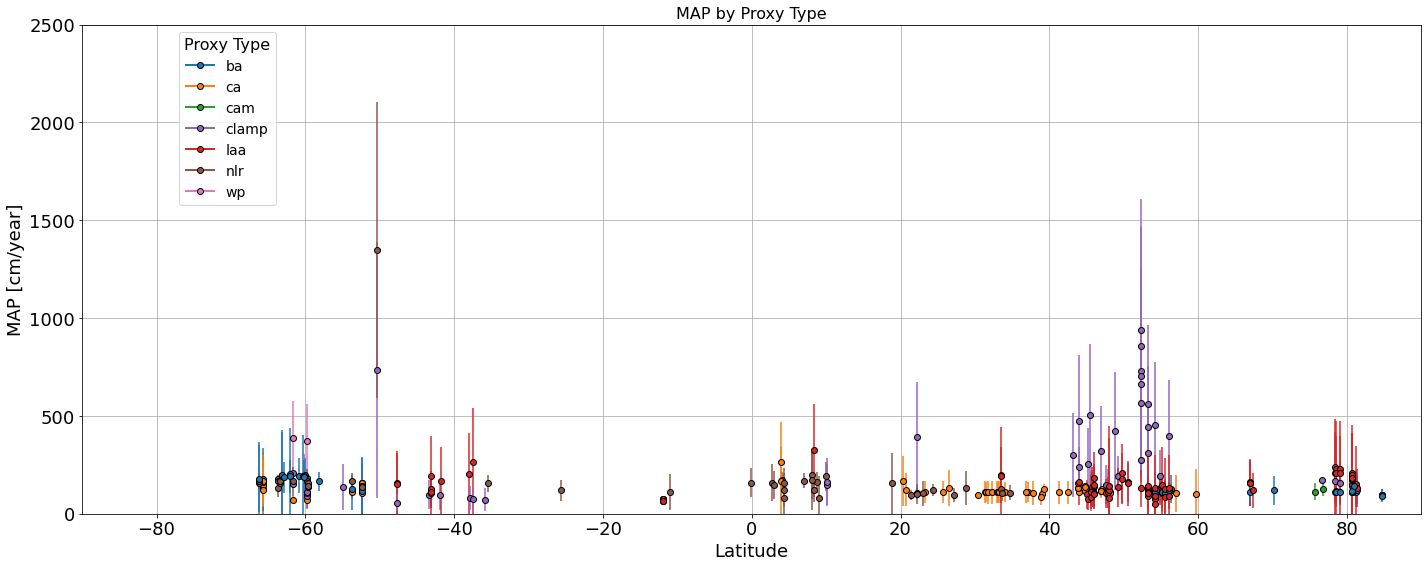

In [14]:
# Plot in origional units of cm per year with Hotspots 45Ma lat
plt.figure(figsize=(24,9))

cols=['tab:blue','tab:orange','tab:green','tab:purple','tab:red','tab:brown','tab:pink','tab:cyan','tab:brown']
d = {np.unique(prox.proxytype)[x]: cols[x] for x in range(len(np.unique(prox.proxytype)))}

for i in eocene.index:
    plt.errorbar(eocene['paleolat_HS_45'][i],eocene['map_average'][i],yerr=(eocene['map_max'][i]-eocene['map_min'][i]),ls='none',ecolor=d[eocene['proxytype'][i]])
    plt.plot(eocene['paleolat_HS_45'][i],eocene['map_average'][i],'ok',color=d[eocene['proxytype'][i]], markeredgecolor='black')
    
plt.xlabel('Latitude', size=18)
plt.ylabel('MAP [cm/year]', size=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([-90,90])
plt.ylim([0,2500])
plt.grid(which='major')

leg=[]
for i in range(len(np.unique(eocene['proxytype']))):
    leg.append(Line2D([0], [0], color=cols[i], marker='o', markeredgecolor='black', lw=2, label=np.unique(eocene['proxytype'])[i]))
plt.legend(handles=leg,bbox_to_anchor=(0.15,1),title='Proxy Type',fontsize=14,title_fontsize=16)
plt.title('MAP by Proxy Type', size=16)
#plt.savefig('MAP_zonal_proxytype.pdf', format='pdf')

Text(0.5, 1.0, 'MAP by Proxy Type')

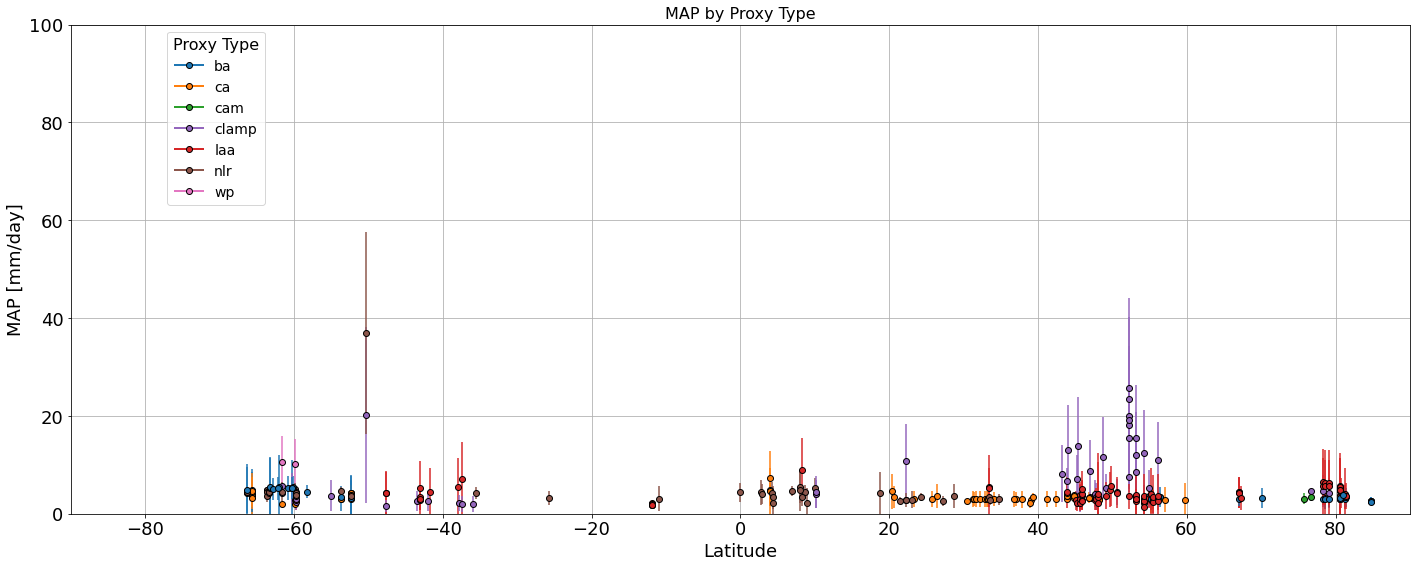

In [15]:
# Plot in mm/day with Hotspots 45Ma lat
plt.figure(figsize=(24,9))

cols=['tab:blue','tab:orange','tab:green','tab:purple','tab:red','tab:brown','tab:pink','tab:cyan','tab:brown']
d = {np.unique(prox.proxytype)[x]: cols[x] for x in range(len(np.unique(prox.proxytype)))}

for i in eocene.index:
    plt.errorbar(eocene['paleolat_HS_45'][i],eocene['map_average'][i]*10/365,yerr=(eocene['map_max'][i]-eocene['map_min'][i])*10/365,ls='none',ecolor=d[eocene['proxytype'][i]])
    plt.plot(eocene['paleolat_HS_45'][i],eocene['map_average'][i]*10/365,'ok',color=d[eocene['proxytype'][i]], markeredgecolor='black')
    
plt.xlabel('Latitude', size=18)
plt.ylabel('MAP [mm/day]', size=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([-90,90])
plt.ylim([0,100])
plt.grid(which='major')

leg=[]
for i in range(len(np.unique(eocene['proxytype']))):
    leg.append(Line2D([0], [0], color=cols[i], marker='o', markeredgecolor='black', lw=2, label=np.unique(eocene['proxytype'])[i]))
plt.legend(handles=leg,bbox_to_anchor=(0.15,1),title='Proxy Type',fontsize=14,title_fontsize=16)
plt.title('MAP by Proxy Type', size=16)
#plt.savefig('MAP_zonal_proxytype.pdf', format='pdf')

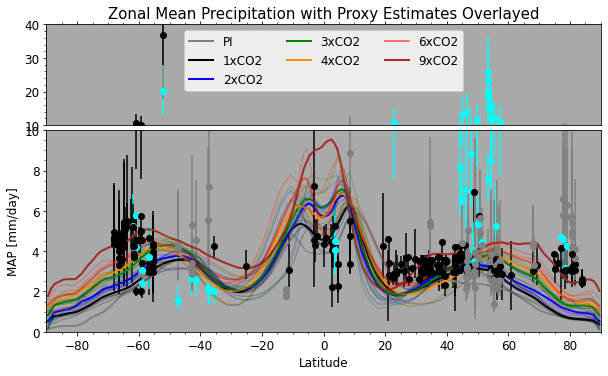

In [16]:
#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya

cols=['black','black','black','cyan','grey','black','black']
d = {np.unique(prox.proxytype)[x]: cols[x] for x in range(len(np.unique(prox.proxytype)))}

fig=plt.figure(figsize=(11,7)) # A

# add two axes
ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) 
ax2 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) 

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')


# plot the field by looping over axes

for i, ax in enumerate([ax1, ax2]):  
    ax.plot(lat,np.nanmean(przonal[:,:,0],1), color='grey', label='PI',linewidth=2.0);
    ax.plot(lat,np.nanmean(przonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
    ax.plot(lat,np.nanmean(przonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)

    for i in range(len(model)):
        ax.plot(lat,przonal[:,i,1], color='black', alpha=.2);
        ax.plot(lat,przonal[:,i,2], color='blue', alpha=.2)
        ax.plot(lat,przonal[:,i,3], color='green', alpha=.2)
        ax.plot(lat,przonal[:,i,4], color='darkorange', alpha=.2)
        ax.plot(lat,przonal[:,i,5], color='red', alpha=.2)
        ax.plot(lat,przonal[:,i,6], color='brown', alpha=.2)
 
    #ax.errorbar(paleolats[recon],eocenepr_avg,yerr=[eocenepr_avg-eocenepr_min,eocenepr_max-eocenepr_avg],ls='none',color=d[eocene['proxytype']])
    #ax.plot(paleolats[recon],eocenepr_avg,'ok') 
    #ax.errorbar(paleolats[recon],eocenepr_avg,yerr=[eocenepr_avg-eocenepr_min,eocenepr_max-eocenepr_avg],ls='none',color='k')
    #ax.plot(paleolats[recon],eocenepr_avg,'ok') 
    for b in eocene.index:
        ax.errorbar(paleolats[recon][b],eocenepr_avg[b],yerr=[[eocenepr_avg[b]-eocenepr_min[b]],[eocenepr_max[b]-eocenepr_avg[b]]],ls='none',color=d[eocene['proxytype'][b]])
        ax.plot(paleolats[recon][b],eocenepr_avg[b],'o',color=d[eocene['proxytype'][b]])    

#plt.legend(loc='upper left',fontsize=15)
#plt.legend(bbox_to_anchor=(1.02, 1.05),fontsize=12,ncol=3)
plt.legend(loc='upper center',fontsize=12,ncol=3)

# set tick properties top axis
ax2.set_xticklabels([])
#ax2.set_yticklabels(np.arange(15, 40, 5))
ax2.minorticks_on()
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(axis='y', labelsize=12)

# set tick properties bottom axis
ax1.minorticks_on()
ax1.set_xlabel('Latitude',fontsize=12)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# axis label
ax1.set_ylabel('MAP [mm/day]',fontsize=12)
#ax1.yaxis.set_label_coords(-0.12, 1.05)

# set axis limits
ax1.set_ylim([0, 10])
ax1.set_xlim([-90, 90])
ax2.set_ylim([10, 40])
ax2.set_xlim([-90, 90])

plt.title('Zonal Mean Precipitation with Proxy Estimates Overlayed',size=15) 

#plt.savefig('./plots/przonal_withobs_55Ma.pdf', format='pdf')
plt.savefig('./plots/Fig12a_przonal_withobs_55Ma.pdf', format='pdf')

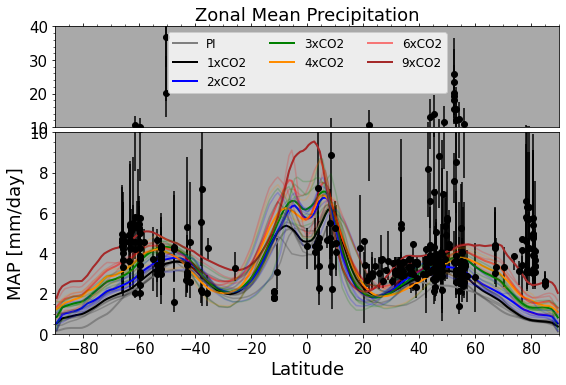

In [17]:
#recon=0 #which reconstruction to use: 0=hotspots 59mya
recon=1 #which reconstruction to use: 1=hotspots 45mya
#recon=4 #which reconstruction to use: 4=hotspots 55mya

fig=plt.figure(figsize=(10,7)) # A

# add two axes
ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) 
ax2 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) 

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')


# plot the field by looping over axes

for i, ax in enumerate([ax1, ax2]):  
    ax.plot(lat,np.nanmean(przonal[:,:,0],1), color='grey', label='PI',linewidth=2.0);
    ax.plot(lat,np.nanmean(przonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
    ax.plot(lat,np.nanmean(przonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)

    for i in range(len(model)):
        ax.plot(lat,przonal[:,i,1], color='black', alpha=.2);
        ax.plot(lat,przonal[:,i,2], color='blue', alpha=.2)
        ax.plot(lat,przonal[:,i,3], color='green', alpha=.2)
        ax.plot(lat,przonal[:,i,4], color='darkorange', alpha=.2)
        ax.plot(lat,przonal[:,i,5], color='red', alpha=.2)
        ax.plot(lat,przonal[:,i,6], color='brown', alpha=.2)
    
    ax.errorbar(paleolats[recon],eocenepr_avg,yerr=[eocenepr_avg-eocenepr_min,eocenepr_max-eocenepr_avg],ls='none',color='k')
    ax.plot(paleolats[recon],eocenepr_avg,'ok')        

#plt.legend(loc='upper left',fontsize=15)
#plt.legend(bbox_to_anchor=(1.02, 1.05),fontsize=12,ncol=3)
plt.legend(loc='upper center',fontsize=12,ncol=3)

# set tick properties top axis
ax2.set_xticklabels([])
#ax2.set_yticklabels(np.arange(15, 40, 5))
ax2.minorticks_on()
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(axis='y', labelsize=15)

# set tick properties bottom axis
ax1.minorticks_on()
ax1.set_xlabel('Latitude',fontsize=18)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# axis label
ax1.set_ylabel('MAP [mm/day]',fontsize=18)
#ax1.yaxis.set_label_coords(-0.12, 1.05)

# set axis limits
ax1.set_ylim([0, 10])
ax2.set_ylim([10, 40])
ax1.set_xlim([-90, 90])
ax2.set_xlim([-90, 90])

plt.title('Zonal Mean Precipitation',size=18) 

    
plt.savefig('./plots/przonal_withobs_45Ma.pdf', format='pdf')

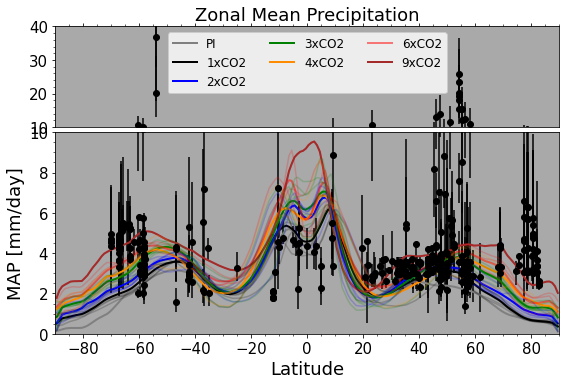

In [18]:
recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
#recon=4 #which reconstruction to use: 4=hotspots 55mya

fig=plt.figure(figsize=(10,7)) # A

# add two axes
ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) 
ax2 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) 

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')


# plot the field by looping over axes

for i, ax in enumerate([ax1, ax2]):  
    ax.plot(lat,np.nanmean(przonal[:,:,0],1), color='grey', label='PI',linewidth=2.0);
    ax.plot(lat,np.nanmean(przonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
    ax.plot(lat,np.nanmean(przonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
    ax.plot(lat,np.nanmean(przonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)

    for i in range(len(model)):
        ax.plot(lat,przonal[:,i,1], color='black', alpha=.2);
        ax.plot(lat,przonal[:,i,2], color='blue', alpha=.2)
        ax.plot(lat,przonal[:,i,3], color='green', alpha=.2)
        ax.plot(lat,przonal[:,i,4], color='darkorange', alpha=.2)
        ax.plot(lat,przonal[:,i,5], color='red', alpha=.2)
        ax.plot(lat,przonal[:,i,6], color='brown', alpha=.2)
    
    ax.errorbar(paleolats[recon],eocenepr_avg,yerr=[eocenepr_avg-eocenepr_min,eocenepr_max-eocenepr_avg],ls='none',color='k')
    ax.plot(paleolats[recon],eocenepr_avg,'ok')        

#plt.legend(loc='upper left',fontsize=15)
#plt.legend(bbox_to_anchor=(1.02, 1.05),fontsize=12,ncol=3)
plt.legend(loc='upper center',fontsize=12,ncol=3)

# set tick properties top axis
ax2.set_xticklabels([])
#ax2.set_yticklabels(np.arange(15, 40, 5))
ax2.minorticks_on()
ax2.xaxis.set_ticks_position('top')
ax2.tick_params(axis='y', labelsize=15)

# set tick properties bottom axis
ax1.minorticks_on()
ax1.set_xlabel('Latitude',fontsize=18)
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# axis label
ax1.set_ylabel('MAP [mm/day]',fontsize=18)
#ax1.yaxis.set_label_coords(-0.12, 1.05)

# set axis limits
ax1.set_ylim([0, 10])
ax2.set_ylim([10, 40])
ax1.set_xlim([-90, 90])
ax2.set_xlim([-90, 90])

plt.title('Zonal Mean Precipitation',size=18) 

    
plt.savefig('./plots/przonal_withobs_59Ma.pdf', format='pdf')

Land model = HadCM3
proxy recon = 55 Ma


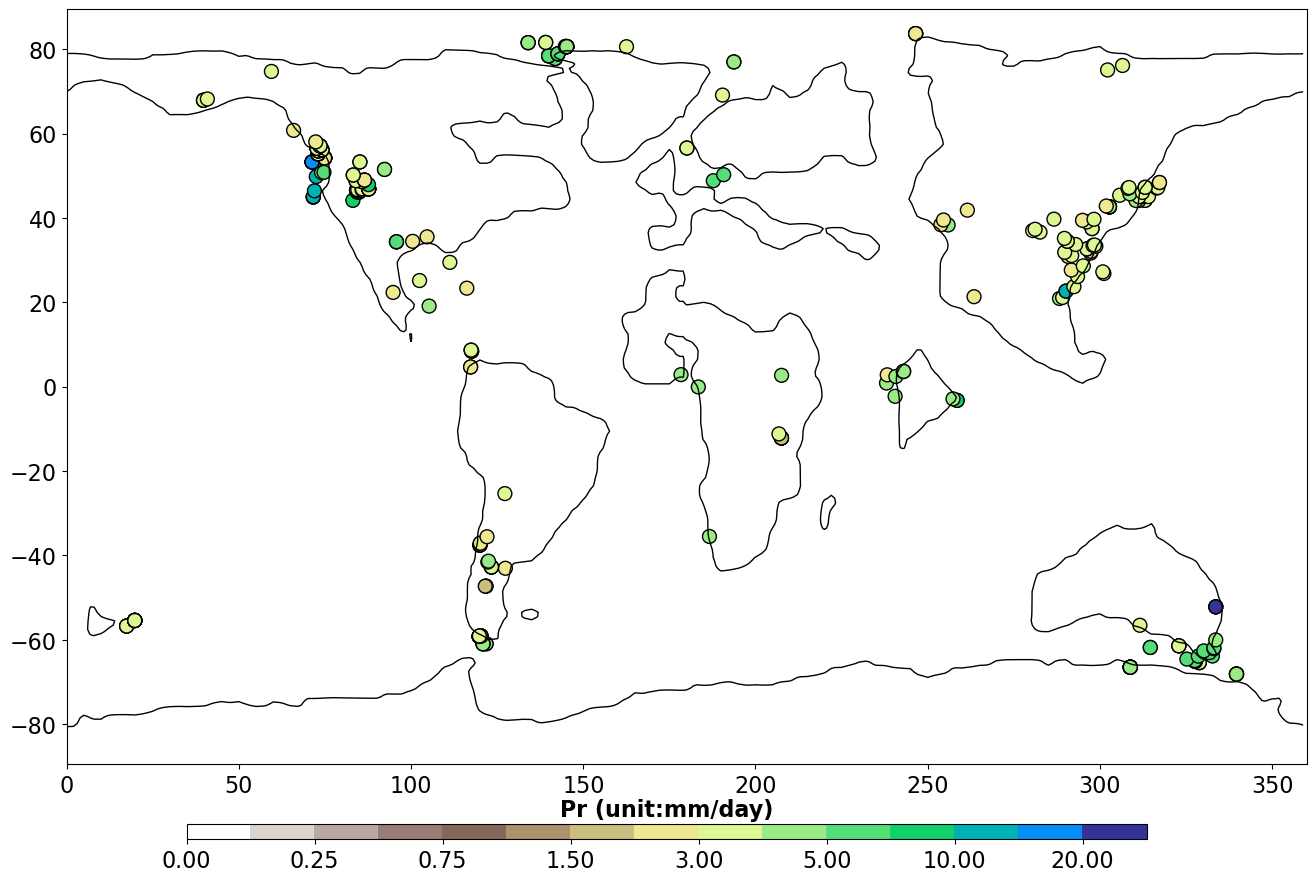

In [19]:
import matplotlib.colors as mcolors

contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25]
cmap = plt.get_cmap('terrain_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)
#norm = matplotlib.colors.Normalize(vmin=0, vmax=25)

fig = plt.figure(figsize=(16, 10), dpi=100) #figsize(weight,height)
landmod=3
#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya
land=sftlf[:,:,0,landmod]      #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo

plt.contour(lon,lat,np.concatenate( (land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
cf=plt.scatter(np.where(paleolons[recon]<180,paleolons[recon]+180,paleolons[recon]-180),paleolats[recon], c=eocenepr_avg, marker='o', edgecolors='k', norm=norm, cmap=cmap, s=100)
plt.xlim([0, 360])       
plt.tick_params(labelsize=16)

#fig.subplots_adjust(wspace=0.05,hspace=0.01)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
#cbar = plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
cbar = plt.colorbar(cf,cax=cbar_ax1, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
plt.title('Pr (unit:mm/day)',fontsize=16,fontweight='bold')

plt.savefig('./plots/Precip_ProxyOnly_LatLon.pdf', format='pdf')
print('Land model = '+mdir[landmod])
age=['59 Ma','45 Ma','59 Ma','45 Ma','55 Ma']
print('proxy recon = '+age[recon])

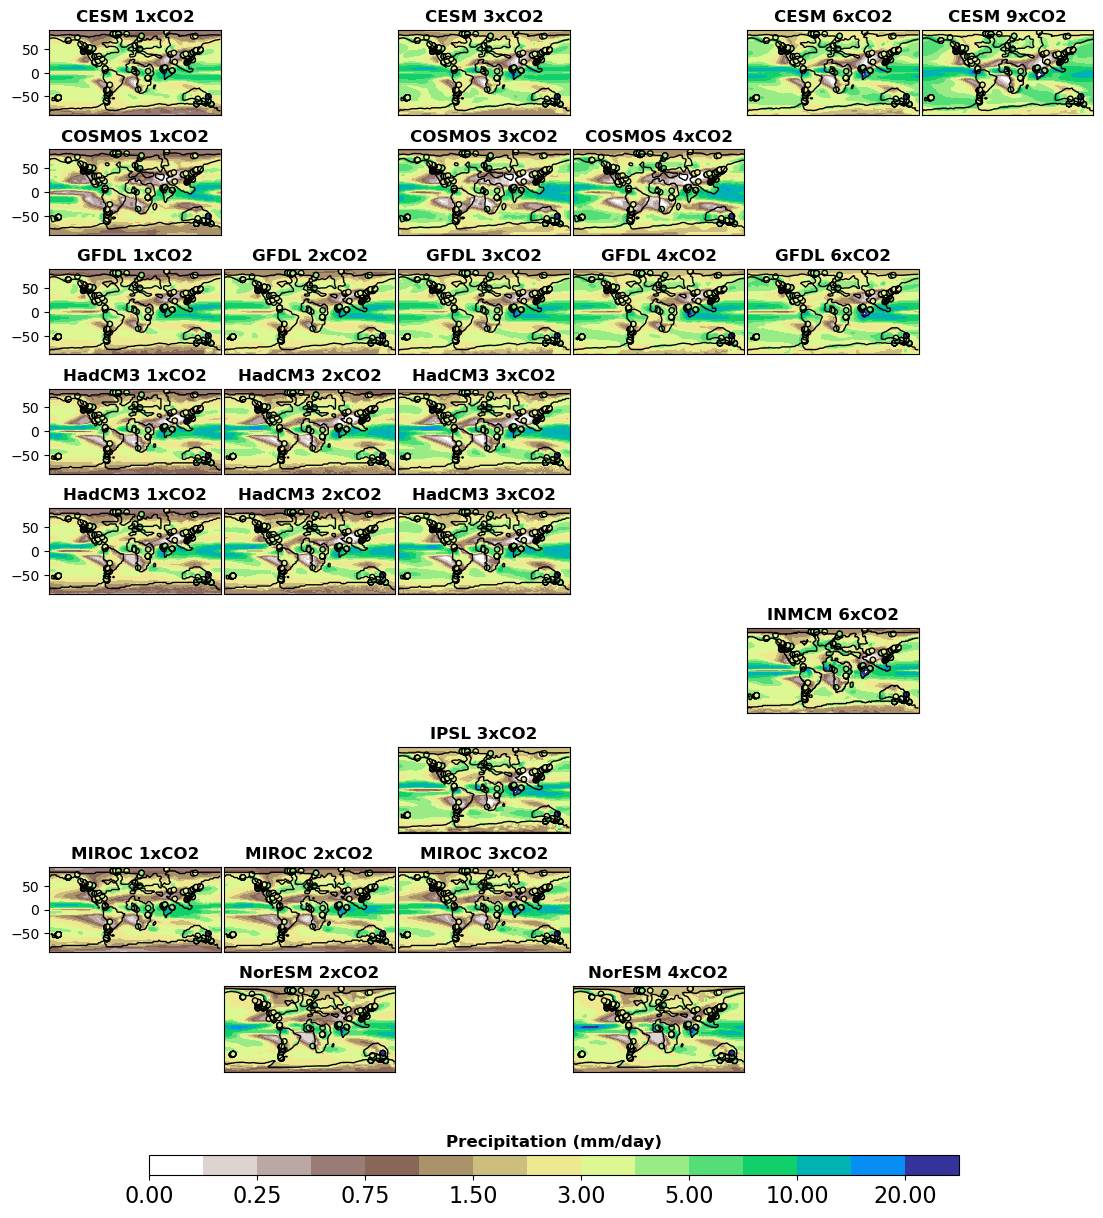

In [20]:
# postage stamp plots

import matplotlib.colors as mcolors

#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya

contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25]
cmap = plt.get_cmap('terrain_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)

ncols = 6
nrows = 9
fig = plt.figure(figsize=(13.5,13.8), dpi=100) #figsize(weight,height)
     #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo
for i in range(9): #rows/models
    for j in range(6): #cols/co2
        if np.all(np.isnan(pr[:,:,i,j+1])):
            continue
        ax = fig.add_subplot(nrows, ncols, ncols*i+j+1)
        ax.set_aspect('equal')
        land=sftlf[:,:,i,j+1] 
        cs=plt.contourf(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate( (pr[:,180:,i,j+1],pr[:,:180,i,j+1]), axis=1), contour_levels, norm=norm, cmap=cmap)
        plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
        plt.title(mdir[i]+' '+proj[j+1][-5:],fontsize=12,fontweight='bold')
        #cf=plt.scatter(eocene['ModLon'],eocene['ModLat'], c=eocene['ProxyAverage'], vmin=-9, vmax=9, marker='o', edgecolors='k', norm=norm, cmap='BrBG')
        cf=plt.scatter(np.where(paleolons[recon]<180,paleolons[recon],paleolons[recon]-360),paleolats[1], c=eocenepr_avg, marker='o', edgecolors='k', norm=norm, cmap=cmap, s=15)
        plt.xlim([-180, 180])
        ax.get_xaxis().set_visible(False)
        if j!=0:
            ax.get_yaxis().set_visible(False)
        #ax.text(7,-85, np.around(biasrmse[j,i],decimals=1),fontsize=12,color='whitesmoke',fontweight='bold')

fig.subplots_adjust(wspace=0.005,hspace=0.4)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
cbar = plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
plt.title('Precipitation (mm/day)',fontsize=12,fontweight='bold')

plt.savefig('./plots/AllModels_Precip_ModelProxy_LatLon.pdf', format='pdf')

Land model = HadCM3
proxy recon = 55 Ma


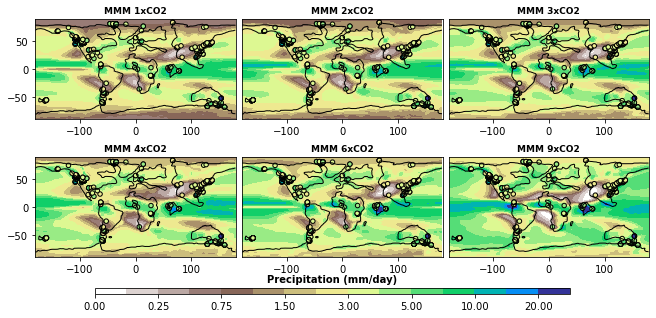

In [21]:
import matplotlib.colors as mcolors

#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya


contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25]
cmap = plt.get_cmap('terrain_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)

ncols = 3
nrows = 2
#fig = plt.figure(figsize=(17, 8), dpi=100) #figsize(weight,height)
fig=plt.figure(figsize=(11,5)) # A4
landmod=3
land=sftlf[:,:,0,landmod]      #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo
for i in range(len(proj)-1): 
            ax = fig.add_subplot(nrows, ncols, i+1)
            ax.set_aspect('equal')
            cs=plt.contourf(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((prMMM[:,180:,i],prMMM[:,:180,i]), axis=1), contour_levels, norm=norm, extend='max', cmap=cmap)
            plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate( (land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
            plt.title('MMM '+proj[i+1][-5:],fontsize=9,fontweight='bold')
            #cf=plt.scatter(eocene['ModLon'],eocene['ModLat'], c=eocene['ProxyAverage'], vmin=-9, vmax=9, marker='o', edgecolors='k', norm=norm, cmap='BrBG')
            cf=plt.scatter(np.where(paleolons[recon]<180,paleolons[recon],paleolons[recon]-360),paleolats[recon], c=eocenepr_avg, marker='o', edgecolors='k', norm=norm, cmap=cmap, s=20)
            plt.xlim([-180, 180])
            if i!=0 and i!=3:
                ax.get_yaxis().set_visible(False)
            #ax.text(7,-85, np.around(MMMbiasrmse[i],decimals=1),fontsize=14,color='black',backgroundcolor='grey')


fig.subplots_adjust(wspace=0.03,hspace=0.03)
cbar_ax1 = fig.add_axes([0.2, 0.07, .6, 0.015])
#cbar = plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
cbar = plt.colorbar(cf,cax=cbar_ax1, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
#cbar.ax.tick_params(which='both',labelsize=16)
plt.title('Precipitation (mm/day)',fontsize=10,fontweight='bold')

plt.savefig('./plots/Fig12b_Precip_Proxy_LatLon.pdf', format='pdf')
print('Land model = '+mdir[landmod])
age=['59 Ma','45 Ma','59 Ma','45 Ma','55 Ma']
print('proxy recon = '+age[recon])

Land model = HadCM3
proxy recon = 55 Ma


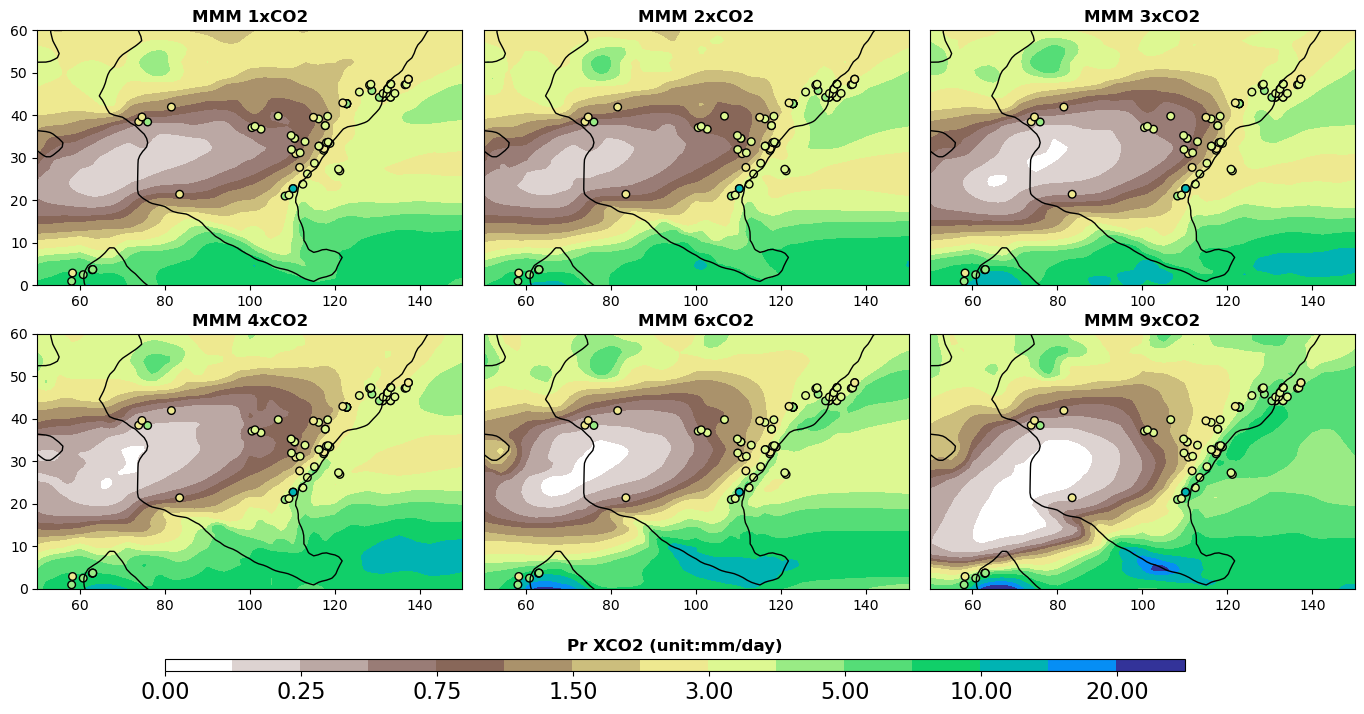

In [22]:
import matplotlib.colors as mcolors

#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya

contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25]
cmap = plt.get_cmap('terrain_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)

ncols = 3
nrows = 2
fig = plt.figure(figsize=(17, 8), dpi=100) #figsize(weight,height)
landmod=3
land=sftlf[:,:,0,landmod]      #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo
for i in range(len(proj)-1): 
            ax = fig.add_subplot(nrows, ncols, i+1)
            ax.set_aspect('equal')
            cs=plt.contourf(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((prMMM[:,180:,i],prMMM[:,:180,i]), axis=1), contour_levels, norm=norm, extend='max', cmap=cmap)
            plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate( (land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
            plt.title('MMM '+proj[i+1][-5:],fontsize=12,fontweight='bold')
            #cf=plt.scatter(eocene['ModLon'],eocene['ModLat'], c=eocene['ProxyAverage'], vmin=-9, vmax=9, marker='o', edgecolors='k', norm=norm, cmap='BrBG')
            cf=plt.scatter(np.where(paleolons[recon]<180,paleolons[recon],paleolons[recon]-360),paleolats[recon], c=eocenepr_avg, marker='o', edgecolors='k', norm=norm, cmap=cmap, s=30)
            plt.xlim([50, 150])
            plt.ylim([0, 60])
            if i!=0 and i!=3:
                ax.get_yaxis().set_visible(False)
            #ax.text(7,-85, np.around(MMMbiasrmse[i],decimals=1),fontsize=14,color='black',backgroundcolor='grey')


fig.subplots_adjust(wspace=0.05,hspace=0.01)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
#cbar = plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
cbar = plt.colorbar(cf,cax=cbar_ax1, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
plt.title('Pr XCO2 (unit:mm/day)',fontsize=12,fontweight='bold')

#plt.savefig('/homes/sknapp4/deepmippaper2021/Precip_ModelProxy_LatLon.pdf', format='pdf')
plt.savefig('./plots/PrecipAsia_Proxy_LatLon.pdf', format='pdf')
print('Land model = '+mdir[landmod])
age=['59 Ma','45 Ma','59 Ma','45 Ma','55 Ma']
print('proxy recon = '+age[recon])

Land model = HadCM3
proxy recon = 55 Ma


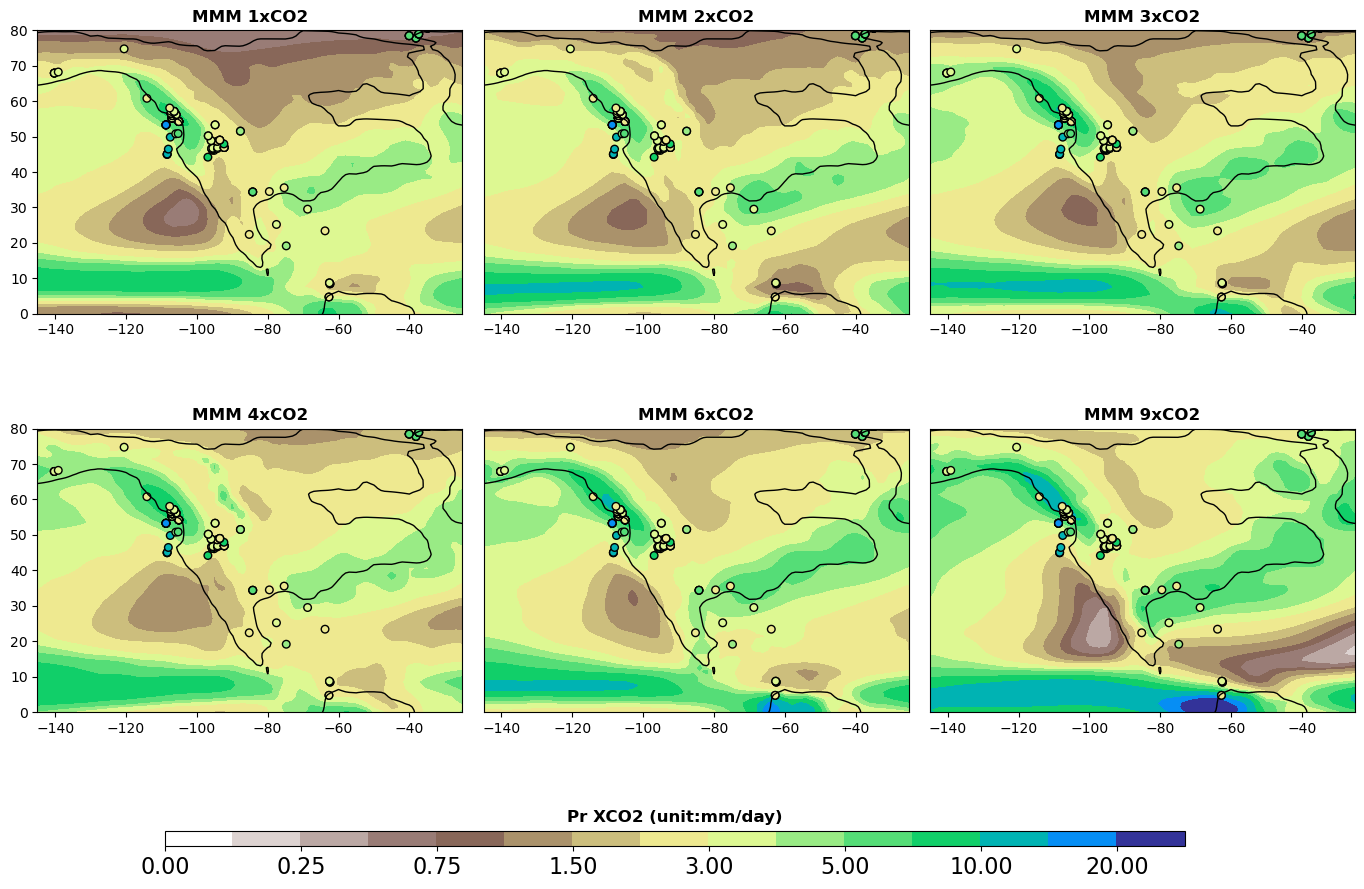

In [23]:
import matplotlib.colors as mcolors

#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya

contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25]
cmap = plt.get_cmap('terrain_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)

ncols = 3
nrows = 2
fig = plt.figure(figsize=(17, 10.5), dpi=100) #figsize(weight,height)
landmod=3
land=sftlf[:,:,0,landmod]      #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo
for i in range(len(proj)-1): 
            ax = fig.add_subplot(nrows, ncols, i+1)
            ax.set_aspect('equal')
            cs=plt.contourf(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((prMMM[:,180:,i],prMMM[:,:180,i]), axis=1), contour_levels, norm=norm, extend='max', cmap=cmap)
            plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate( (land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
            plt.title('MMM '+proj[i+1][-5:],fontsize=12,fontweight='bold')
            #cf=plt.scatter(eocene['ModLon'],eocene['ModLat'], c=eocene['ProxyAverage'], vmin=-9, vmax=9, marker='o', edgecolors='k', norm=norm, cmap='BrBG')
            cf=plt.scatter(np.where(paleolons[recon]<180,paleolons[recon],paleolons[recon]-360),paleolats[recon], c=eocenepr_avg, marker='o', edgecolors='k', norm=norm, cmap=cmap, s=30)
            plt.xlim([-145, -25])
            plt.ylim([0, 80])
            if i!=0 and i!=3:
                ax.get_yaxis().set_visible(False)
            #ax.text(7,-85, np.around(MMMbiasrmse[i],decimals=1),fontsize=14,color='black',backgroundcolor='grey')


fig.subplots_adjust(wspace=0.05,hspace=0.01)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
#cbar = plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
cbar = plt.colorbar(cf,cax=cbar_ax1, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
plt.title('Pr XCO2 (unit:mm/day)',fontsize=12,fontweight='bold')

#plt.savefig('/homes/sknapp4/deepmippaper2021/Precip_ModelProxy_LatLon.pdf', format='pdf')
plt.savefig('./plots/PrecipNorthAmerica_Proxy_LatLon.pdf', format='pdf')
print('Land model = '+mdir[landmod])
age=['59 Ma','45 Ma','59 Ma','45 Ma','55 Ma']
print('proxy recon = '+age[recon])

Land model = HadCM3
proxy recon = 55 Ma


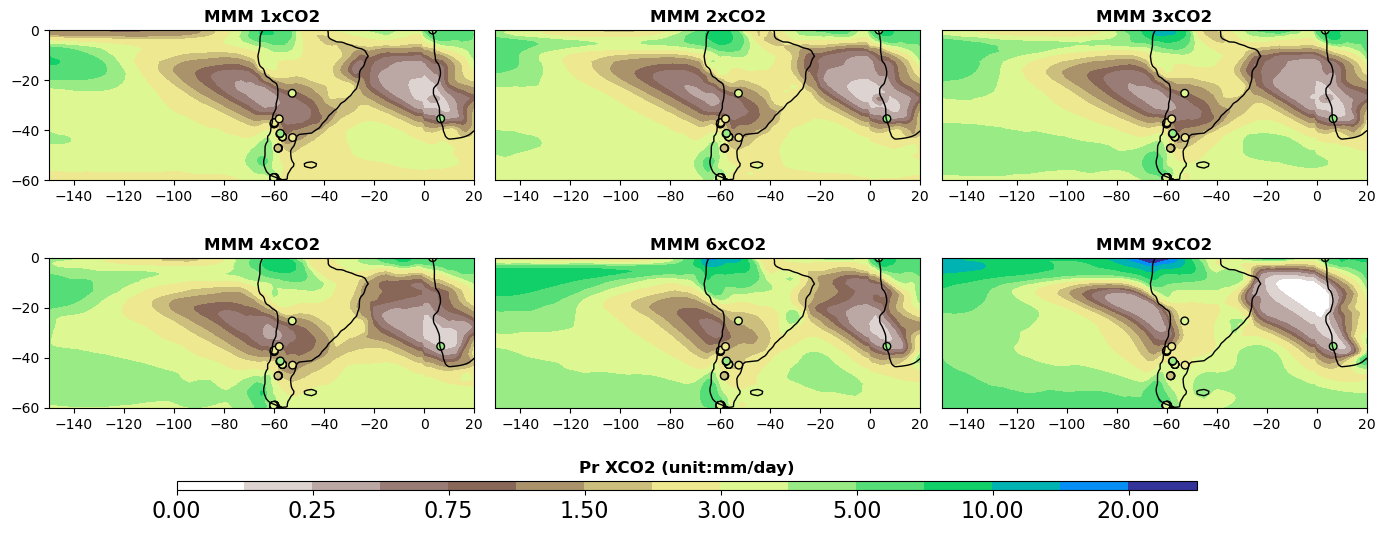

In [24]:
import matplotlib.colors as mcolors

#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya

contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 15, 20, 25]
cmap = plt.get_cmap('terrain_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)

ncols = 3
nrows = 2
fig = plt.figure(figsize=(17, 6), dpi=100) #figsize(weight,height)
landmod=3
land=sftlf[:,:,0,landmod]      #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo
for i in range(len(proj)-1): 
            ax = fig.add_subplot(nrows, ncols, i+1)
            ax.set_aspect('equal')
            cs=plt.contourf(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((prMMM[:,180:,i],prMMM[:,:180,i]), axis=1), contour_levels, norm=norm, extend='max', cmap=cmap)
            plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
            plt.title('MMM '+proj[i+1][-5:],fontsize=12,fontweight='bold')
            #cf=plt.scatter(eocene['ModLon'],eocene['ModLat'], c=eocene['ProxyAverage'], vmin=-9, vmax=9, marker='o', edgecolors='k', norm=norm, cmap='BrBG')
            cf=plt.scatter(np.where(paleolons[recon]<180,paleolons[recon],paleolons[recon]-360),paleolats[recon], c=eocenepr_avg, marker='o', edgecolors='k', norm=norm, cmap=cmap, s=30)
            plt.xlim([-150, 20])
            plt.ylim([-60, 0])
            if i!=0 and i!=3:
                ax.get_yaxis().set_visible(False)
            #ax.text(7,-85, np.around(MMMbiasrmse[i],decimals=1),fontsize=14,color='black',backgroundcolor='grey')


fig.subplots_adjust(wspace=0.05,hspace=0.01)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
#cbar = plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
cbar = plt.colorbar(cf,cax=cbar_ax1, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
plt.title('Pr XCO2 (unit:mm/day)',fontsize=12,fontweight='bold')

#plt.savefig('/homes/sknapp4/deepmippaper2021/Precip_ModelProxy_LatLon.pdf', format='pdf')
plt.savefig('./plots/PrecipSouthAmerica_Proxy_LatLon.pdf', format='pdf')
print('Land model = '+mdir[landmod])
age=['59 Ma','45 Ma','59 Ma','45 Ma','55 Ma']
print('proxy recon = '+age[recon])

## Individual Model Biases

In [25]:
# model-data bias method for all models part 1: find model uncertainty using min/max value in adjacent grid cells

modelmaxes=[]
modelmins=[]
modelval=[]

modellons=lon #assumes 0-360
modellats=lat 

#originlat=lat_eoceneearly  #(data) lats
#originlon=lon_eoceneearly  #(data) lons


if modellats.max() >90: #automatically convert lats to -90,90
    modellats[:]-=90
# if originlat.max() >90:
#     originlat[:]-=90
    
def find_nearest(modelcoords, datacoord): #return index of model coord nearest to data coord (either lat or lon, not both at once)
    array = np.asarray(modelcoords)
    indx = (np.abs(modelcoords - datacoord)).argmin()
    return indx

for m in range(9): # all models
    modelmaxes.append([])
    modelmins.append([])
    modelval.append([])
    for ex in range(1,7): #all experiments after pi
            
        modelmaxes[m].append([])
        modelmins[m].append([])
        modelval[m].append([])
        
        if np.any(np.isnan(pr[:,:,m,ex])):
            modelmaxes[m][ex-1]=np.nan
            modelmins[m][ex-1]=np.nan
            modelval[m][ex-1]=np.nan
            continue
            
        for i in range(len(eocenepr_avg)): #for each proxy datum
            tmpmax=[]
            tmpmin=[]
            tmpval=[]
            for j in range(2): # only 2 times/hotspots

                ref_lat=find_nearest(modellats,paleolats[j][i])
                ref_lon=find_nearest(modellons,paleolons[j][i])
                
                tmpval.append(pr[ref_lat,ref_lon,m,ex])

                if ref_lon==359: 

                    #for each model, find the max/min value in the 9 adjacent model grid cells, considering both early/late data locations
                    tmpmax.append( np.nanmax( [ pr[ref_lat+1,ref_lon-1,m,ex], \
                                    pr[ref_lat+1,ref_lon,m,ex], \
                                    pr[ref_lat+1,0,m,ex], \
                                    pr[ref_lat,ref_lon-1,m,ex], \
                                    pr[ref_lat,ref_lon,m,ex], \
                                    pr[ref_lat,0,m,ex], \
                                    pr[ref_lat-1,ref_lon-1,m,ex], \
                                    pr[ref_lat-1,ref_lon,m,ex], \
                                    pr[ref_lat-1,0,m,ex]  ] ) )
                    tmpmin.append( np.nanmin( [ pr[ref_lat+1,ref_lon-1,m,ex], \
                                    pr[ref_lat+1,ref_lon,m,ex], \
                                    pr[ref_lat+1,0,m,ex], \
                                    pr[ref_lat,ref_lon-1,m,ex], \
                                    pr[ref_lat,ref_lon,m,ex], \
                                    pr[ref_lat,0,m,ex], \
                                    pr[ref_lat-1,ref_lon-1,m,ex], \
                                    pr[ref_lat-1,ref_lon,m,ex], \
                                    pr[ref_lat-1,0,m,ex] ] ) )
                else:
                    tmpmax.append( np.nanmax( [ pr[ref_lat+1,ref_lon-1,m,ex], \
                                    pr[ref_lat+1,ref_lon,m,ex], \
                                    pr[ref_lat+1,ref_lon+1,m,ex], \
                                    pr[ref_lat,ref_lon-1,m,ex], \
                                    pr[ref_lat,ref_lon,m,ex], \
                                    pr[ref_lat,ref_lon+1,m,ex], \
                                    pr[ref_lat-1,ref_lon-1,m,ex], \
                                    pr[ref_lat-1,ref_lon,m,ex], \
                                    pr[ref_lat-1,ref_lon+1,m,ex] ] ) )
                    tmpmin.append( np.nanmin( [ pr[ref_lat+1,ref_lon-1,m,ex], \
                                    pr[ref_lat+1,ref_lon,m,ex], \
                                    pr[ref_lat+1,ref_lon+1,m,ex], \
                                    pr[ref_lat,ref_lon-1,m,ex], \
                                    pr[ref_lat,ref_lon,m,ex], \
                                    pr[ref_lat,ref_lon+1,m,ex], \
                                    pr[ref_lat-1,ref_lon-1,m,ex], \
                                    pr[ref_lat-1,ref_lon,m,ex], \
                                    pr[ref_lat-1,ref_lon+1,m,ex] ] ) )
            modelmaxes[m][ex-1].append(max(tmpmax))
            modelmins[m][ex-1].append(min(tmpmin))
            modelval[m][ex-1].append(np.mean(tmpval))

        

In [26]:
# model-data bias method part 2: find biases based on overlapping model and data uncertainty bounds 

bias=np.empty((6,9,len(eocenepr_avg)))

for m in range(9):
    
    for ex in range(6):
        
        if np.all(np.isnan(modelmaxes[m][ex])):
            bias[ex,m,:]=np.nan
            continue

        for i in range(len(eocenepr_avg)):
            diff1 = eocenepr_min[i]-modelmaxes[m][ex][i]
            diff2 = modelmins[m][ex][i]-eocenepr_max[i]

            if diff1>0:
                prbias=-diff1
            elif diff2>0:
                prbias=diff2
            elif np.isnan(diff2):
                prbias=np.nan
            else:
                prbias=0
            bias[ex,m,i]=(prbias)
        
biasmean=np.nanmean(bias,axis=2)
#print(np.round(biasmean,decimals=2))
biasrmse=np.sqrt(np.nanmean(np.square(bias),axis=2))
#print(np.round(biasrmse,decimals=2))        

In [27]:
# calcluate the regionl mean biases

tropics=np.where((paleolats[recon][:]>-15) & (paleolats[recon][:]<15))
subtropics_S=np.where((paleolats[recon][:]>-30) & (paleolats[recon][:]<-15))
subtropics_N=np.where((paleolats[recon][:]>15) & (paleolats[recon][:]<30))
midlats_S=np.where((paleolats[recon][:]>-60) & (paleolats[recon][:]<-30))
midlats_N=np.where((paleolats[recon][:]>-30) & (paleolats[recon][:]<60))
highlats_S=np.where((paleolats[recon][:]>-90) & (paleolats[recon][:]<-60))
highlats_N=np.where((paleolats[recon][:]>-60) & (paleolats[recon][:]<90))

tropical_biasmean=np.nanmean(bias[:,:,tropics[0][:]],axis=2)
tropical_biasrmse=np.sqrt(np.nanmean(np.square(bias[:,:,tropics[0][:]]),axis=2))
subtropics_biasmean=np.nanmean(bias[:,:,np.concatenate((subtropics_S[0][:], subtropics_N[0][:]), axis=0) ],axis=2)
subtropics_biasrmse=np.sqrt(np.nanmean(np.square(bias[:,:,np.concatenate((subtropics_S[0][:], subtropics_N[0][:]), axis=0) ]),axis=2))
midlats_biasmean=np.nanmean(bias[:,:,np.concatenate((midlats_S[0][:], midlats_N[0][:]), axis=0) ],axis=2)
midlats_biasrmse=np.sqrt(np.nanmean(np.square(bias[:,:,np.concatenate((midlats_S[0][:], midlats_N[0][:]), axis=0) ]),axis=2))
highlats_biasmean=np.nanmean(bias[:,:,np.concatenate((highlats_S[0][:], highlats_N[0][:]), axis=0) ],axis=2)
highlats_biasrmse=np.sqrt(np.nanmean(np.square(bias[:,:,np.concatenate((highlats_S[0][:], highlats_N[0][:]), axis=0) ]),axis=2))

#subpe=(Speanom+Npeanom)/2
#Mpe=(SMpeanom+NMpeanom)/2
#Ppe=(SPpeanom+NPpeanom)/2

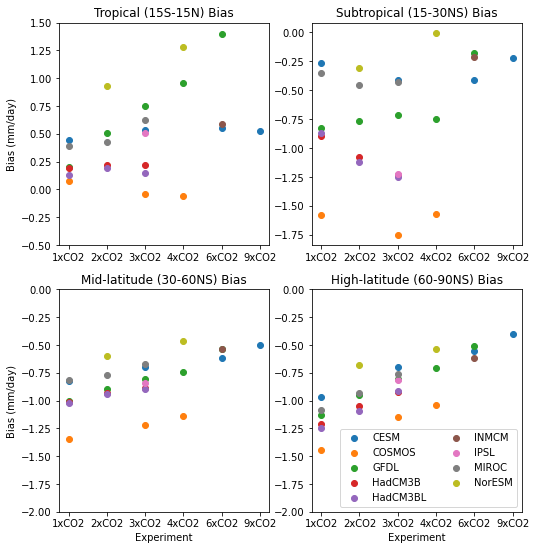

In [28]:
plt.figure(figsize=(8.3,9))
        
for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(proj_name[1:],tropical_biasmean[:,i])
    plt.title('Tropical (15S-15N) Bias',fontsize=12)
    #plt.xlabel("Experiment")
    plt.ylabel("Bias (mm/day)")
    #plt.legend(model_name,loc='lower left',ncol=2)
    #plt.ylim([-2, 1.5])
    plt.ylim([-0.5, 1.5])
for i in range(len(model)):
    plt.subplot(2,2,2)
    plt.scatter(proj_name[1:],subtropics_biasmean[:,i])
    plt.title('Subtropical (15-30NS) Bias',fontsize=12)
    #plt.xlabel("Experiment")
    #plt.ylabel("Bias [mm/day]")
    #plt.legend(model_name,loc='upper left',ncol=2)
    #plt.ylim([-2, 1.5])
    #plt.ylim([-2, 0])
for i in range(len(model)):
    plt.subplot(2,2,3)
    plt.scatter(proj_name[1:],midlats_biasmean[:,i])
    plt.title('Mid-latitude (30-60NS) Bias',fontsize=12)
    plt.xlabel("Experiment")
    plt.ylabel("Bias (mm/day)")
    #plt.legend(model_name,loc='upper left',ncol=2)
    #plt.ylim([-2, 1.5])
    plt.ylim([-2, 0])
for i in range(len(model)):
    plt.subplot(2,2,4)
    plt.scatter(proj_name[1:],highlats_biasmean[:,i])
    plt.title('High-latitude (60-90NS) Bias',fontsize=12)
    plt.xlabel("Experiment")
    #plt.ylabel("Bias [mm/day]")
    plt.legend(model_name,loc='lower right',ncol=2)
    #plt.ylim([-2, 1.5])
    plt.ylim([-2, 0])
    
    
#plt.tick_params(labelsize=20)
plt.savefig('./plots/Fig14_RegionalPrecip_Bias_scatter.pdf', format='pdf')

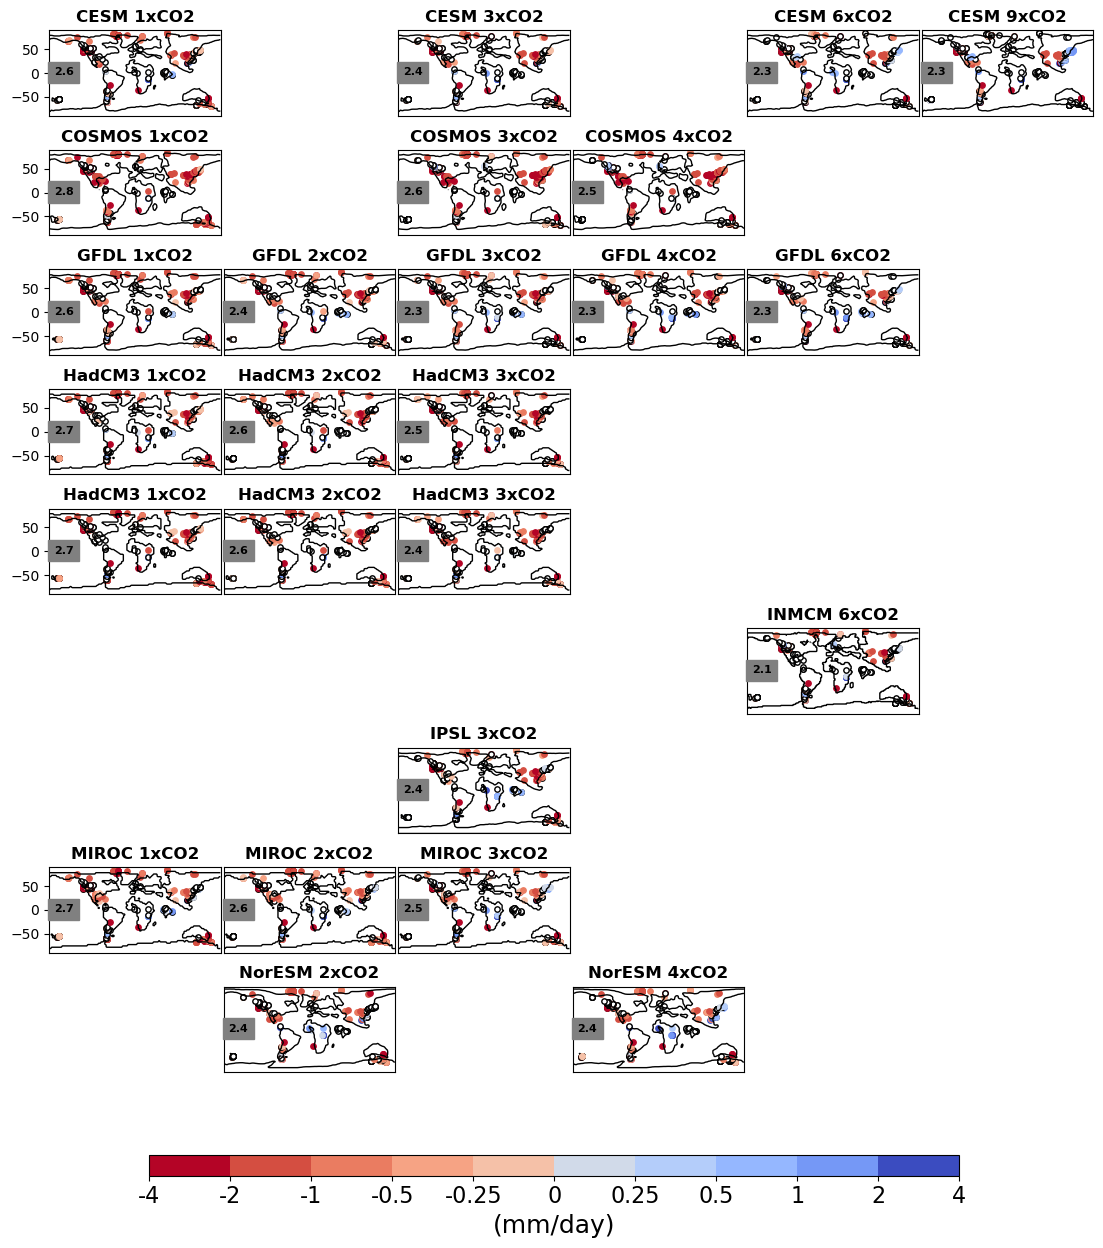

In [29]:
# biases only
# postage stamp plots

#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya

contour_levels=[-4,-2,-1,-0.5,-0.25,0,0.25,0.5,1,2,4]
#norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)
cmap = plt.get_cmap('coolwarm_r', 12)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)


ncols = 6
nrows = 9
fig = plt.figure(figsize=(13.5,13.8), dpi=100) #figsize(weight,height)

for i in range(9): 
    for j in range(6): 
        if np.all(np.isnan(pr[:,:,i,j+1])):
            continue
        ax = fig.add_subplot(nrows, ncols, ncols*i+j+1)
        ax.set_aspect('equal')
        land=sftlf[:,:,i,j+1] 
        plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) #taking only the 2nd highest level. highest level (1) has weird artifacts
        plt.title(mdir[i]+' '+proj[j+1][-5:],fontsize=12,fontweight='bold')
        for k in range(319):
            if bias[j,i,k]==0:
                     cool=plt.scatter(np.where(paleolons[recon][k]<180,paleolons[recon][k],paleolons[recon][k]-360),paleolats[recon][k], c='white', marker='o', edgecolors='black', norm=norm, cmap=cmap, s=15)
                     #cf=plt.scatter(np.where(paleolons[recon][k]<180,paleolons[recon][k],paleolons[recon][k]-360),paleolats[recon][k], c='face', marker='o', edgecolors='face', norm=norm, cmap=cmap, s=15)
            else:
                     cf=plt.scatter(np.where(paleolons[recon][k]<180,paleolons[recon][k],paleolons[recon][k]-360),paleolats[recon][k], c=bias[j,i,k], marker='o', edgecolors='face', norm=norm, cmap=cmap, s=15)
        plt.xlim([-180, 180])
        ax.get_xaxis().set_visible(False)
        if j!=0:
            ax.get_yaxis().set_visible(False)
        ax.text(-170,-5, np.around(biasrmse[j,i],decimals=1),fontsize=8,color='black',backgroundcolor='grey',fontweight='bold')
        

fig.subplots_adjust(wspace=0.005,hspace=0.4)
cbar_ax1 = fig.add_axes([0.2, 0.05, .6, 0.015])
cbar = plt.colorbar(cf,cax=cbar_ax1,ticks=contour_levels, orientation="horizontal")
cbar.set_label('(mm/day)',size=18)
cbar.ax.tick_params(which='both',labelsize=16)
cbar.ax.set_xticklabels(contour_levels)
#plt.title('Precipitation Bias (mm/day)',fontsize=12,fontweight='bold')

plt.savefig('./plots/AllModels_Precip_Biases_LatLon.pdf', format='pdf')

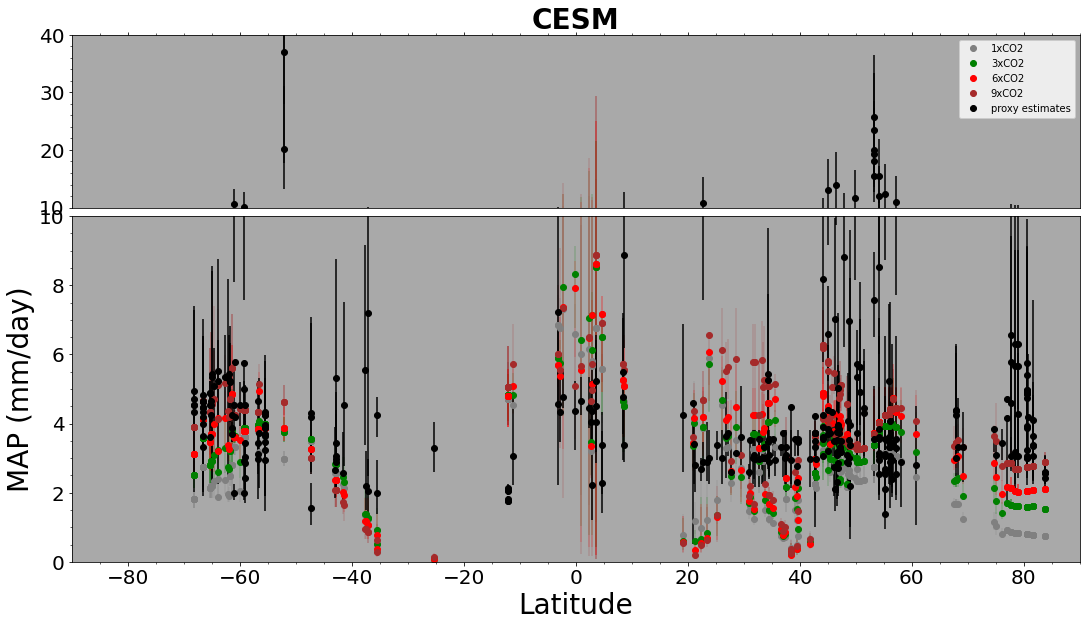

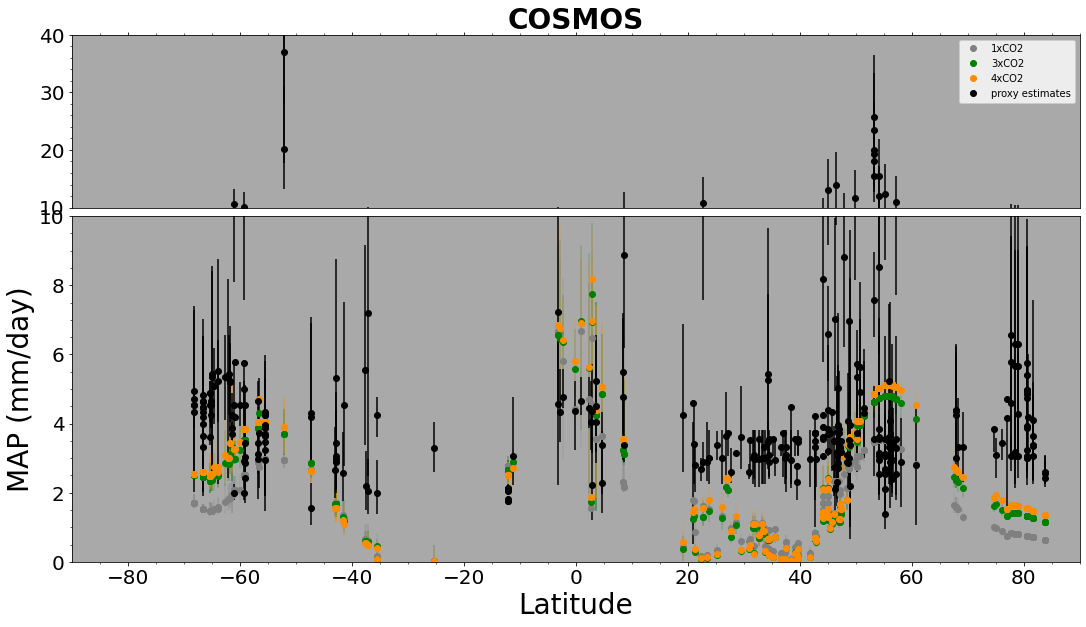

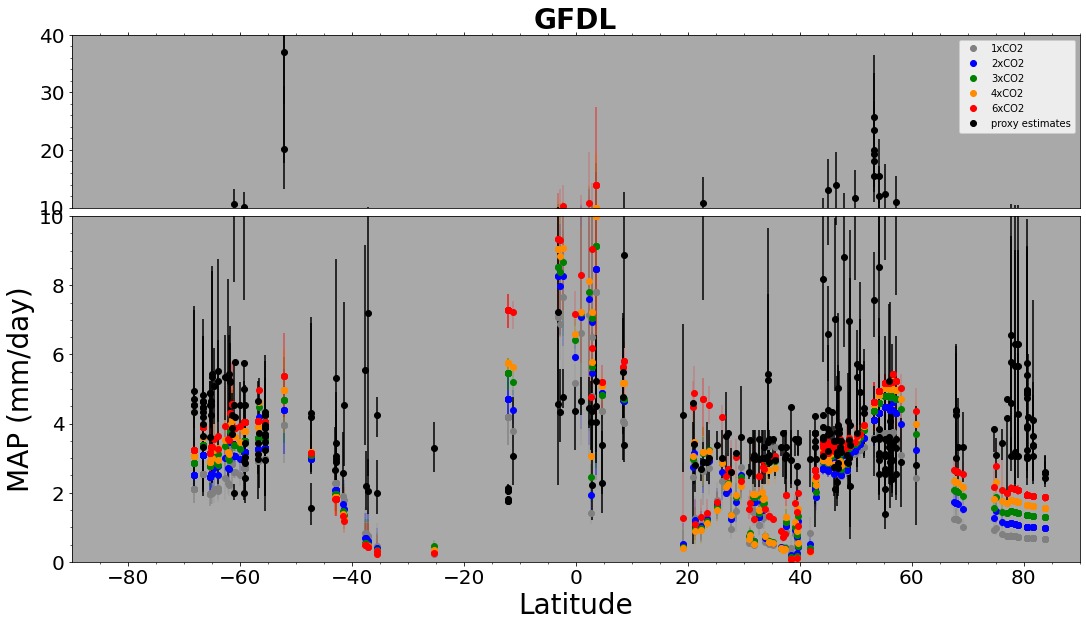

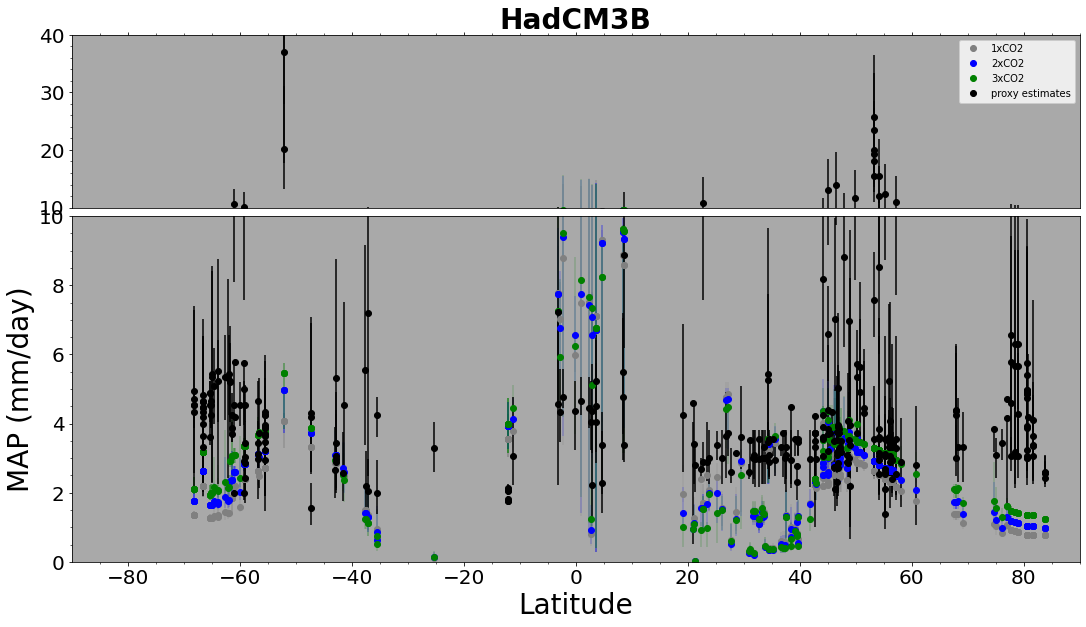

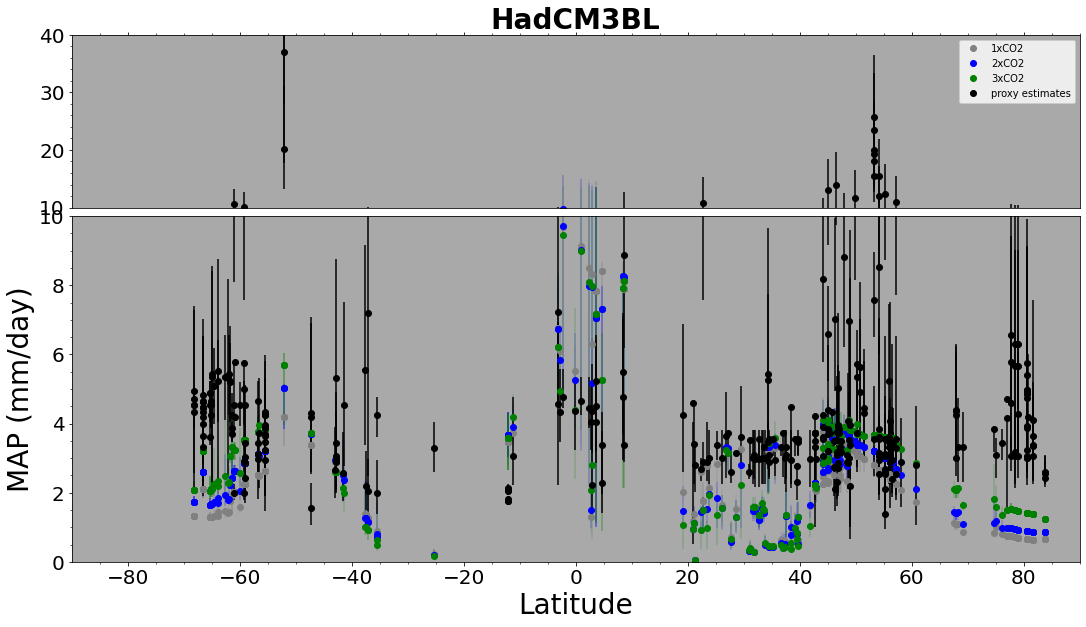

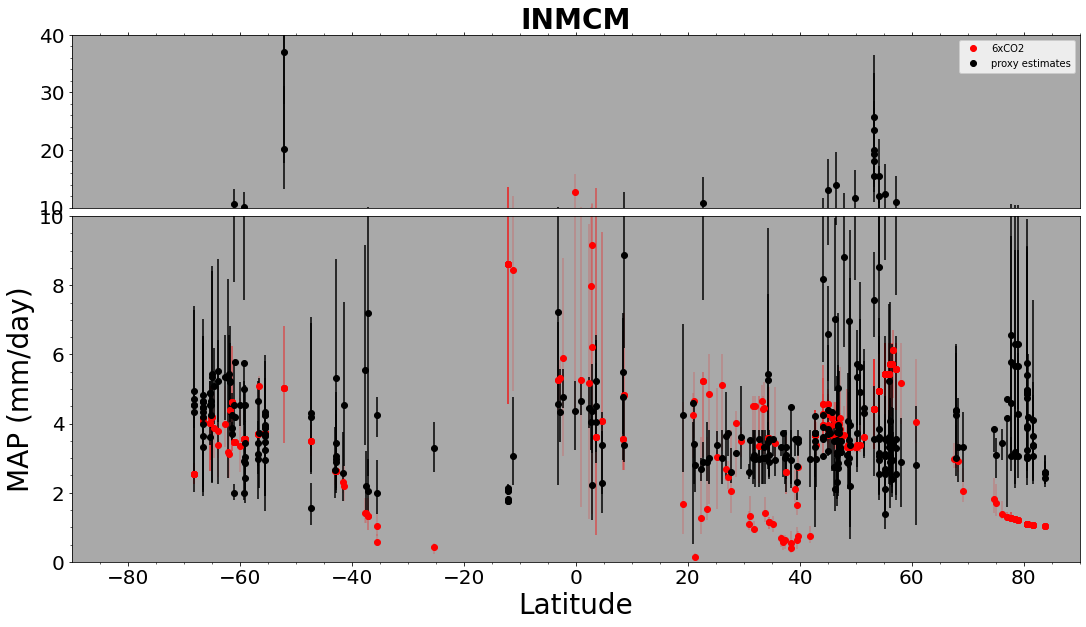

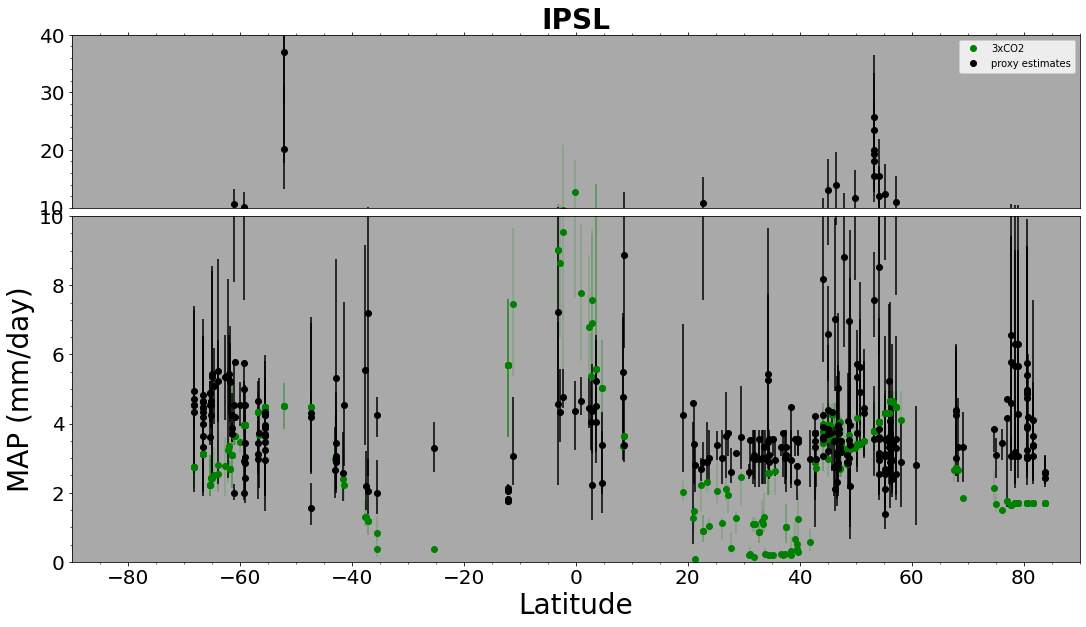

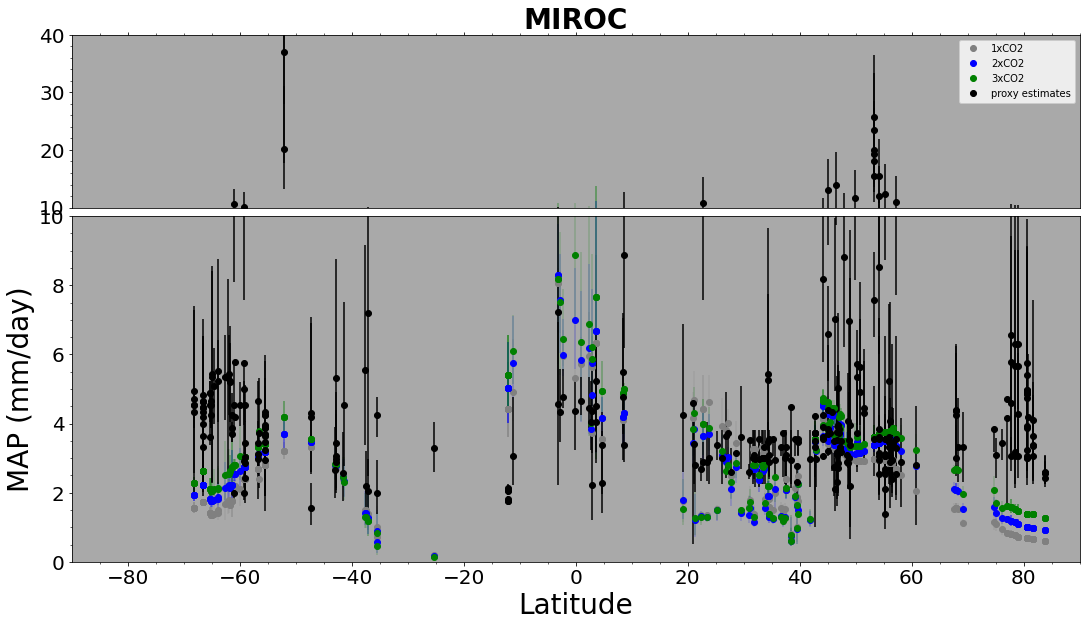

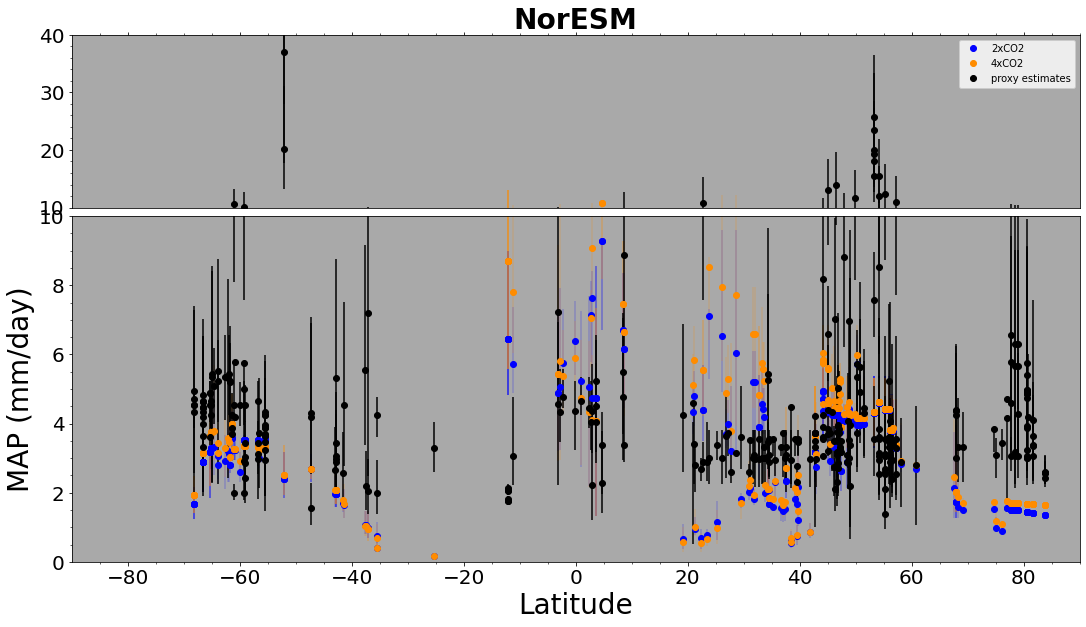

In [30]:
exp_color_strs=['grey','blue','green','darkorange','red','brown']
#recon=0 #which reconstruction to use: 1=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 1=hotspots 55mya

for model_num in range(len(model_name)):
#model_num=0

        fig = plt.figure(figsize=(20, 12))

        #nrows=3
        #ncols=3
        #loop over experiments
        #fig.add_subplot(nrows, ncols, model_num+1)

        # add two axes
        ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) 
        ax2 = fig.add_axes([0.1, 0.51, 0.7, 0.2]) 


        # set the background color where 
        ax1.set_facecolor('darkgray')
        ax2.set_facecolor('darkgray')


        # plot the field by looping over axes

        for i, ax in enumerate([ax1, ax2]):  
            for j in range(len(proj)-1):
                if np.all(np.isnan(biasrmse[j,model_num])):
                    continue
                ax.errorbar(paleolats[recon],modelval[model_num][j],yerr=[np.array(modelval[model_num][j])-np.array(modelmins[model_num][j]),np.array(modelmaxes[model_num][j])-np.array(modelval[model_num][j])],ls='none',color=exp_color_strs[j],alpha=.2)
                ax.plot(paleolats[recon],modelval[model_num][j],'o',label=proj_name[j+1],color=exp_color_strs[j])
            ax.errorbar(paleolats[recon],eocenepr_avg,yerr=[eocenepr_avg-eocenepr_min,eocenepr_max-eocenepr_avg],ls='none',color='black')
            ax.plot(paleolats[recon],eocenepr_avg,'ok',label="proxy estimates")      

        plt.legend()

        # set tick properties top axis
        ax2.set_xticklabels([])
        #ax2.set_yticklabels(np.arange(15, 40, 5))
        ax2.minorticks_on()
        ax2.xaxis.set_ticks_position('top')
        ax2.tick_params(axis='y', labelsize=20)

        # set tick properties bottom axis
        ax1.minorticks_on()
        ax1.set_xlabel('Latitude',fontsize=28)
        ax1.xaxis.set_ticks_position('bottom')
        ax1.tick_params(axis='x', labelsize=20)
        ax1.tick_params(axis='y', labelsize=20)

        # axis label
        ax1.set_ylabel('MAP (mm/day)',fontsize=28)
        #ax1.yaxis.set_label_coords(-0.12, 1.05)

        # set axis limits
        ax1.set_ylim([0, 10])
        ax2.set_ylim([10, 40])
        ax1.set_xlim([-90, 90])
        ax2.set_xlim([-90, 90])

        plt.title(model_name[model_num],fontsize=28,fontweight='bold')

        plt.savefig('./plots/FigS10_AllModels_Zonal_ModelDataPrecip'+model_name[model_num]+'.pdf', format='pdf')
             
             

## MMM Biases

In [31]:
# natalie's method part 1: find min/max value in adjacent grid cells USING the MMM

MMMmodelmaxes=[]
MMMmodelmins=[]

modellons=lon #assumes 0-360
modellats=lat 

originlat=eocene['modlat'] #(data) lats
originlon=eocene['modlon']  #(data) lons


if modellats.max() >90: #automatically convert lats to -90,90
    modellats[:]-=90
# if originlat.max() >90:
#     originlat[:]-=90
    
def find_nearest(modelcoords, datacoord): #return index of model coord nearest to data coord (either lat or lon, not both at once)
    array = np.asarray(modelcoords)
    indx = (np.abs(modelcoords - datacoord)).argmin()
    return indx

for ex in range(6): #all experiments
    MMMmodelmaxes.append([])
    MMMmodelmins.append([])
    for i in range(len(eocenepr_avg)): #for each proxy datum
        tmpmax=[]
        tmpmin=[]
        for j in range(2): # only first 2 times/hotspots
            
            ref_lat=find_nearest(modellats,paleolats[j][i])
            ref_lon=find_nearest(modellons,paleolons[j][i])


            if ref_lon==359: 

                #for each model, find the max/min value in the 9 adjacent model grid cells, considering both early/late data locations
                tmpmax.append( np.nanmax( [ prMMM[ref_lat+1,ref_lon-1,ex], \
                                prMMM[ref_lat+1,ref_lon,ex], \
                                prMMM[ref_lat+1,0,ex], \
                                prMMM[ref_lat,ref_lon-1,ex], \
                                prMMM[ref_lat,ref_lon,ex], \
                                prMMM[ref_lat,0,ex], \
                                prMMM[ref_lat-1,ref_lon-1,ex], \
                                prMMM[ref_lat-1,ref_lon,ex], \
                                prMMM[ref_lat-1,0,ex]  ] ) )
                tmpmin.append( np.nanmin( [ prMMM[ref_lat+1,ref_lon-1,ex], \
                                prMMM[ref_lat+1,ref_lon,ex], \
                                prMMM[ref_lat+1,0,ex], \
                                prMMM[ref_lat,ref_lon-1,ex], \
                                prMMM[ref_lat,ref_lon,ex], \
                                prMMM[ref_lat,0,ex], \
                                prMMM[ref_lat-1,ref_lon-1,ex], \
                                prMMM[ref_lat-1,ref_lon,ex], \
                                prMMM[ref_lat-1,0,ex] ] ) )
            else:
                tmpmax.append( np.nanmax( [ prMMM[ref_lat+1,ref_lon-1,ex], \
                                prMMM[ref_lat+1,ref_lon,ex], \
                                prMMM[ref_lat+1,ref_lon+1,ex], \
                                prMMM[ref_lat,ref_lon-1,ex], \
                                prMMM[ref_lat,ref_lon,ex], \
                                prMMM[ref_lat,ref_lon+1,ex], \
                                prMMM[ref_lat-1,ref_lon-1,ex], \
                                prMMM[ref_lat-1,ref_lon,ex], \
                                prMMM[ref_lat-1,ref_lon+1,ex] ] ) )
                tmpmin.append( np.nanmin( [ prMMM[ref_lat+1,ref_lon-1,ex], \
                                prMMM[ref_lat+1,ref_lon,ex], \
                                prMMM[ref_lat+1,ref_lon+1,ex], \
                                prMMM[ref_lat,ref_lon-1,ex], \
                                prMMM[ref_lat,ref_lon,ex], \
                                prMMM[ref_lat,ref_lon+1,ex], \
                                prMMM[ref_lat-1,ref_lon-1,ex], \
                                prMMM[ref_lat-1,ref_lon,ex], \
                                prMMM[ref_lat-1,ref_lon+1,ex] ] ) )
        MMMmodelmaxes[ex].append(max(tmpmax))
        MMMmodelmins[ex].append(min(tmpmin))

        

In [32]:
# natalie's method part 2: find biases based on overlapping uncertainty bounds USING the MMM

MMMbias=[]

for ex in range(6):
    
    MMMbias.append([])
    
    for i in range(len(eocenepr_avg)):
        diff1 = eocenepr_min[i]-MMMmodelmaxes[ex][i]
        diff2 = MMMmodelmins[ex][i]-eocenepr_max[i]
        
        if diff1>0:
            prbias=-diff1
        elif diff2>0:
            prbias=diff2
        elif np.isnan(diff2):
            prbias=np.nan
        else:
            prbias=0
        MMMbias[ex].append(prbias)
        
        

In [33]:
MMMbiasmean=np.nanmean(MMMbias,axis=1)
print(MMMbiasmean)
MMMbiasrmse=np.sqrt(np.nanmean(np.square(MMMbias),axis=1))
print(MMMbiasrmse)

[-1.16605631 -0.9384205  -0.85594081 -0.74156713 -0.55002725 -0.40007045]
[2.7146196  2.5436705  2.41414109 2.37010251 2.22838557 2.26751229]


Land model = HadCM3
proxy recon = 55 Ma


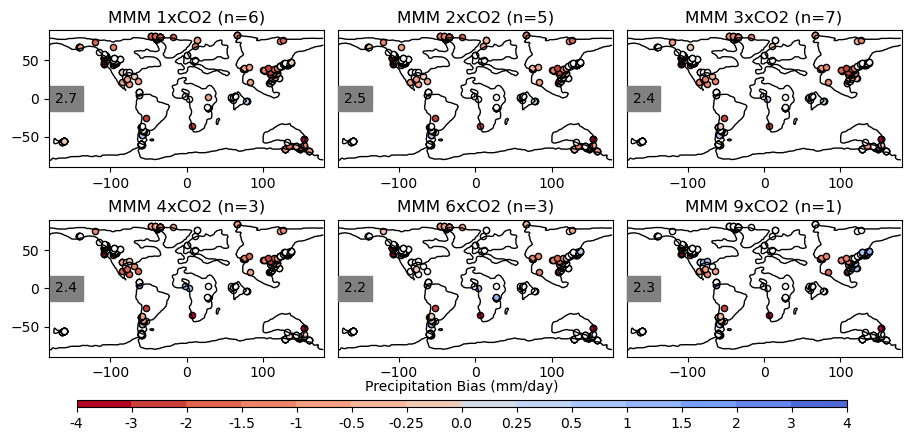

In [34]:
import matplotlib.colors as mcolors

proj_pr=['piControl','1xCO2 (n=6)','2xCO2 (n=5)','3xCO2 (n=7)','4xCO2 (n=3)',\
      '6xCO2 (n=3)','9xCO2 (n=1)']

#countour_levels=np.arange(-9,10,1)
#cmap=mcolors.Colormap('BrBG', N=19)
#norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=19)

#cmap = 'coolwarm_r' #
#norm = mcolors.Normalize(vmin=-9, vmax=9)
contour_levels=[-4,-3,-2,-1.5,-1,-0.5,-0.25,0.,0.25,0.5,1,1.5,2,3,4]
#norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=256)

cmap = plt.get_cmap('coolwarm_r', 16)
norm = mcolors.BoundaryNorm(contour_levels, cmap.N)
#norm = matplotlib.colors.Normalize(vmin=0, vmax=25)

ncols = 3
nrows = 2
#fig = plt.figure(figsize=(17, 8), dpi=100) #figsize(weight,height)
#fig = plt.figure(figsize=(8.3, 4.2), dpi=100) #figsize(weight,height)
fig = plt.figure(figsize=(11, 5), dpi=100) #figsize(weight,height)
landmod=3
#recon=0 #which reconstruction to use: 0=hotspots 59mya
#recon=1 #which reconstruction to use: 1=hotspots 45mya
recon=4 #which reconstruction to use: 4=hotspots 55mya
land=sftlf[:,:,0,landmod]      #np.average(np.nanmean( sftlf[:,:,:,1:], axis=2), axis=2) #average over all models paleogeography. 0 in axis 3 is modern geo
for i in range(len(proj)-1): 
            ax = fig.add_subplot(nrows, ncols, i+1)
            ax.set_aspect('equal')
            #cs=plt.contourf(lon,lat,np.concatenate( (prMMM[:,180:,i],prMMM[:,:180,i]), axis=1), contour_levels, extend='max', cmap=cmap)
            plt.contour(np.concatenate((lon[180:]-360,lon[:180]), axis=0),lat,np.concatenate((land[:,180:],land[:,:180]), axis=1), colors='black', linewidths=1,levels=[0.5]) # highest level (1) has weird artifacts
            #plt.title('MMM '+proj[i+1][-5:],fontsize=12,fontweight='bold')
            plt.title('MMM '+proj_pr[i+1][:],fontsize=12)
            for j in range(len(MMMbias[i])):
                if paleolons[recon][j]<180:
                    loon=paleolons[recon][j]
                else:
                    loon=paleolons[recon][j]-360
                if MMMbias[i][j]==0:
                    cool=plt.scatter( loon,paleolats[recon][j], c='white', marker='o', edgecolors='k', s=20)
                else:
                    cf=plt.scatter( loon,paleolats[recon][j], c=MMMbias[i][j], marker='o', edgecolors='k', norm=norm, cmap=cmap, s=20)
            plt.xlim([-180, 180])
            if i!=0 and i!=3:
                ax.get_yaxis().set_visible(False)
            ax.text(-172,-5, np.around(MMMbiasrmse[i],decimals=1),fontsize=10,color='black',backgroundcolor='grey')


fig.subplots_adjust(wspace=0.05,hspace=0.01)
cbar_ax1 = fig.add_axes([0.15, 0.075, .7, 0.015])
cbar = plt.colorbar(cf,cax=cbar_ax1,ticks=contour_levels, orientation="horizontal")
#cbar.set_label('[mm/day]',size=18)
cbar.ax.tick_params(which='both',labelsize=10)
cbar.ax.set_xticklabels(contour_levels)
#plt.title('Precipitation Bias (mm/day)',fontsize=12,fontweight='bold')
plt.title('Precipitation Bias (mm/day)',fontsize=10)

#plt.savefig('/homes/sknapp4/deepmippaper2021/Precip_ModelProxyBias_LatLon_withclamp.pdf', format='pdf')
plt.savefig('./plots/Fig13_Precip_ModelProxyBias_LatLon_withclamp.pdf', format='pdf')

print('Land model = '+mdir[landmod])
age=['59 Ma','45 Ma','59 Ma','45 Ma','55 Ma']
print('proxy recon = '+age[recon])

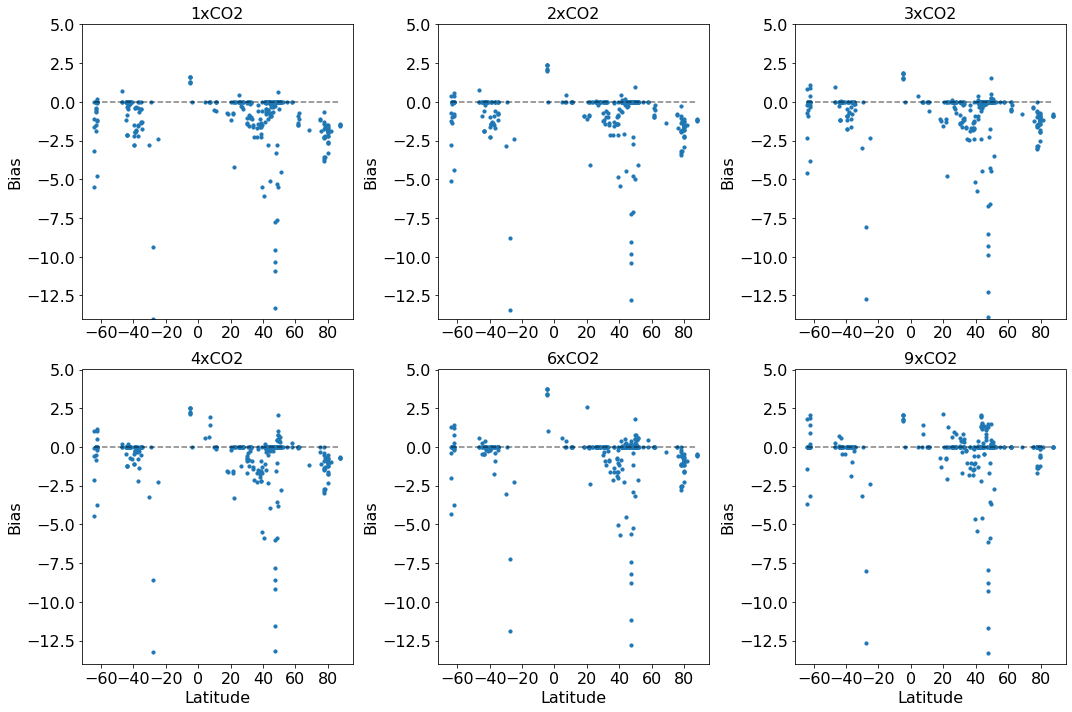

In [35]:
# 1) scatter plot with latitude on the x-axis and the bias on the y-axis as a function on CO2
plt.figure(figsize=(15,10))
titles=['1xCO2','2xCO2','3xCO2','4xCO2','6xCO2','9xCO2']
for i in range(6):
    plt.subplot(2,3,(i+1))
    plt.scatter(eocene['modlat'],MMMbias[i][:],s=10)
    if i>2:
        plt.xlabel('Latitude',fontsize=16)
    plt.ylabel('Bias',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim([-14,5])
    plt.title(titles[i],fontsize=16)
    plt.hlines(0,xmin=np.min(eocene['modlat']),xmax=np.max(eocene['modlat']),color='black',linestyle='--',alpha=0.5)
plt.tight_layout()

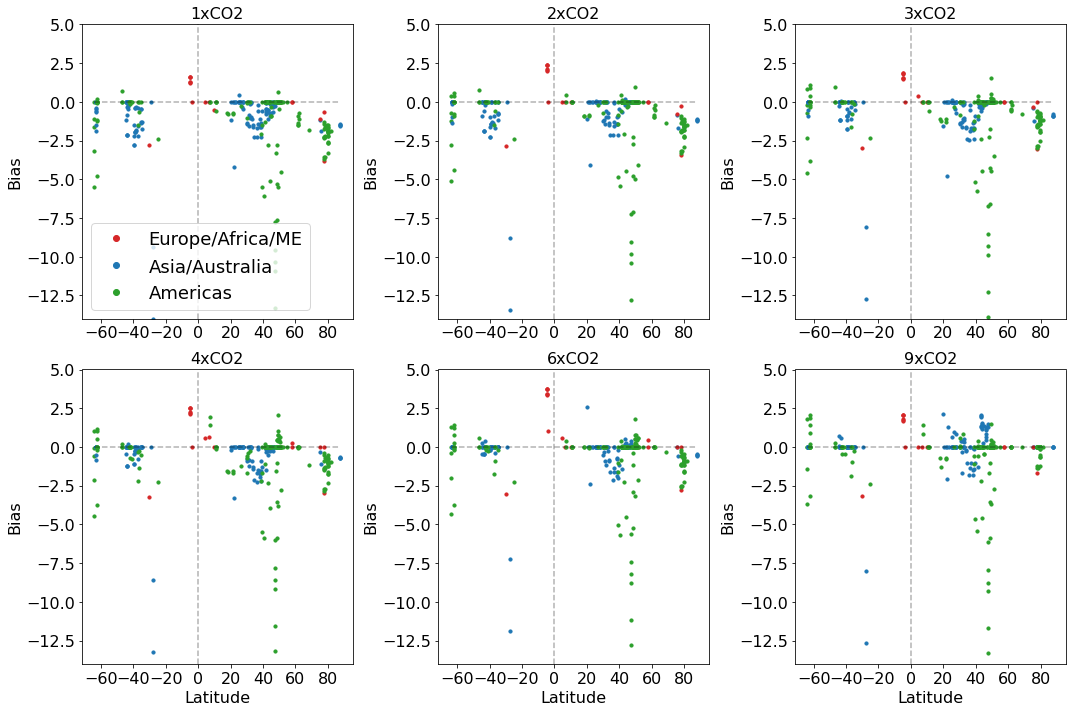

In [36]:

# 1) scatter plot with latitude on the x-axis and the bias on the y-axis as a function on CO2
plt.figure(figsize=(15,10))
titles=['1xCO2','2xCO2','3xCO2','4xCO2','6xCO2','9xCO2']
cols=['tab:red','tab:blue','tab:green']
labs=['Europe/Africa/ME','Asia/Australia','Americas']
for i in range(6):
    plt.subplot(2,3,(i+1))
    for j in range(np.shape(MMMbias)[1]):
        lon2=eocene['modlon'][j]
        if (lon2>-20) & (lon2<60):
            lab='Europe/Africa/ME'
            col=cols[0]
        elif (lon2>60) & (lon2<180):
            lab='Asia/Australia'
            col=cols[1]
        else:
            lab='Americas'
            col=cols[2]
        plt.scatter(eocene['modlat'][j],MMMbias[i][j],s=10,color=col)
    if i>2:
        plt.xlabel('Latitude',fontsize=16)
    plt.ylabel('Bias',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim([-14,5])
    plt.title(titles[i],fontsize=16)
    plt.hlines(0,xmin=np.min(eocene['modlat']),xmax=np.max(eocene['modlat']),color='black',linestyle='--',alpha=0.3)
    plt.vlines(0,ymin=-14,ymax=5,color='black',linestyle='--',alpha=0.3)
    if i==0:
        leg=[]
        for i in range(3):
            leg.append(Line2D([0,0], [0,0], color=cols[i], marker='o', lw=2, label=labs[i],linestyle=''))
        plt.legend(handles=leg,fontsize=18)
plt.tight_layout()